# 1. Problema de clasificación

* ### Objetivo:
> El objetivo es predecir si los ingresos de una persona superan o no los 50.000$ (variable income ).

## 1.1 Análisis exploratorio

In [1]:
# Importamos las librería de: Numpy, Pandas y MatplotLib

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')


import seaborn as sns


from collections import Counter

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sns.set(style='white', context='notebook', palette='deep')

In [2]:
# Cargamos los datos
data = pd.read_csv('census.csv',sep=',', decimal='.')

In [3]:
# Miramos como son los primeros datos
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [4]:
# Miramos como son los últimos datos
data.tail()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
45217,33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
45218,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
45219,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
45220,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K
45221,35,Self-emp-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K


In [5]:
# Caracterizamos los valores numéricos
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45222.0,38.547941,13.217870,17.0,28.0,37.0,47.0,90.0
education-num,45222.0,10.118460,2.552881,1.0,9.0,10.0,13.0,16.0
capital-gain,45222.0,1101.430344,7506.430084,0.0,0.0,0.0,0.0,99999.0
capital-loss,45222.0,88.595418,404.956092,0.0,0.0,0.0,0.0,4356.0
hours-per-week,45222.0,40.938017,12.007508,1.0,40.0,40.0,45.0,99.0


In [6]:
# Vemos las dimensiones de la tabla
data.shape

(45222, 14)

In [7]:
# Miramos de que tipo son los datos
data.dtypes

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

In [8]:
# Sacamos los valores únicos de las columnas que tienen valores categóricos
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [9]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [10]:
data['education_level'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [11]:
data['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [12]:
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [13]:
data['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [14]:
data['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [15]:
data['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [16]:
data['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [17]:
data['education-num'].unique()

array([ 13.,   9.,   7.,  14.,   5.,  10.,  12.,   4.,  16.,  11.,  15.,
         3.,   6.,   1.,   8.,   2.])

In [18]:
data['capital-gain'].unique()

array([  2174.,      0.,  14084.,   5178.,   5013.,   2407.,  14344.,
        15024.,   7688.,   4064.,   4386.,   7298.,   1409.,   3674.,
         1055.,   2050.,   2176.,    594.,  20051.,   6849.,   4101.,
         8614.,   3411.,   2597.,  25236.,   4650.,   2463.,   3103.,
        10605.,   2964.,   3325.,   2580.,   3471.,   4865.,  99999.,
         6514.,   1471.,   2329.,   2105.,   2885.,  10520.,   2202.,
         2961.,  27828.,   6767.,   2228.,   1506.,  13550.,   2635.,
         5556.,   4787.,   3781.,   3137.,   3818.,    914.,    401.,
         2829.,   2977.,   4934.,   2062.,   2354.,   3464.,   5455.,
        15020.,   1424.,   3273.,  22040.,   4416.,  10566.,   4931.,
         7430.,  34095.,   6497.,   3908.,    114.,   2346.,   2907.,
         1151.,   9386.,   2414.,   2290.,   3418.,  15831.,  41310.,
         4508.,   2538.,   3456.,   1848.,   3887.,   7896.,   5721.,
         9562.,   6418.,   1455.,   2036.,   3942.,   1831.,  11678.,
         2936.,   29

In [19]:
# Miramos en los datos si hay valores nulos
df = pd.DataFrame(data)

df.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [20]:
# Quitamos los espacios que tienen los string las variables categóricas
df_obj = df.select_dtypes(['object'])
#print (df_obj)
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
print (df)


       age         workclass education_level  education-num  \
0       39         State-gov       Bachelors           13.0   
1       50  Self-emp-not-inc       Bachelors           13.0   
2       38           Private         HS-grad            9.0   
3       53           Private            11th            7.0   
4       28           Private       Bachelors           13.0   
5       37           Private         Masters           14.0   
6       49           Private             9th            5.0   
7       52  Self-emp-not-inc         HS-grad            9.0   
8       31           Private         Masters           14.0   
9       42           Private       Bachelors           13.0   
10      37           Private    Some-college           10.0   
11      30         State-gov       Bachelors           13.0   
12      23           Private       Bachelors           13.0   
13      32           Private      Assoc-acdm           12.0   
14      34           Private         7th-8th           

In [21]:
# Sustituimos los datos Null por NaN
df = df.fillna(np.nan)

In [22]:
# Obtenemos el tipo de datos
df.dtypes

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

In [23]:
# Visualizamos la cabecera de la tabla
df.head(5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [24]:
# Reformateamos los valores de la columna income 
df['income'] = df['income'].map({'<=50K' : 0, '>50K': 1})
df.head(5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,0
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,0
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,0


## 1.2 Análisis de los datos

In [25]:
# Identificamos las variables numericas
var_numericas = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week','income']

# Identificamos las variables categóricas
var_categoricas = ['workclass', 'education_level', 'marital-status', 'occupation', 'relationship',
                   'race', 'native-country', 'sex']

### 1.2.1 Análisis de las variables numéricas

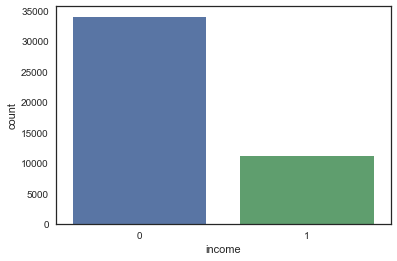

In [26]:
# Hacemos un recuento de <=50K y >50K
sns.countplot(df['income'], label='Contador')
plt.show()

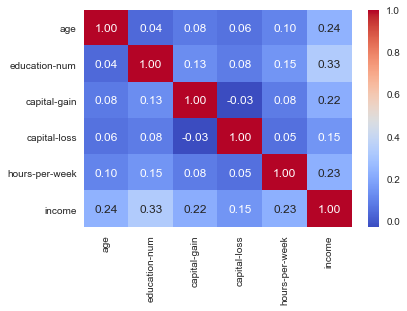

In [27]:
# Correlación entre los valores de las variables numéricas
g = sns.heatmap(df[var_numericas].corr(),annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

* No se observa ninguna correlación entre las variables numéricas.

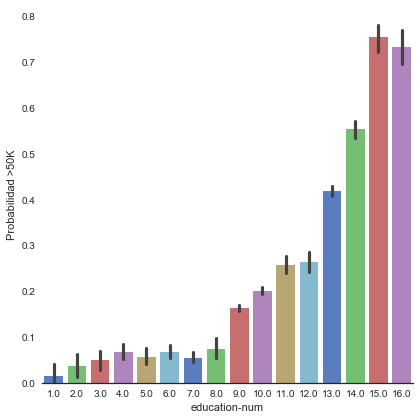

In [28]:
# Análisis explotatorico de education-num vs incomo
g = sns.factorplot(x="education-num",y="income",data=df,kind="bar",size = 6,palette = "muted", legend=False)
g.despine(left=True)
plt.legend(loc='upper left')
g.set_ylabels("Probabilidad >50K")


* A mayor nivel de educación, mayor es la probabilidad de ganar más de 50K

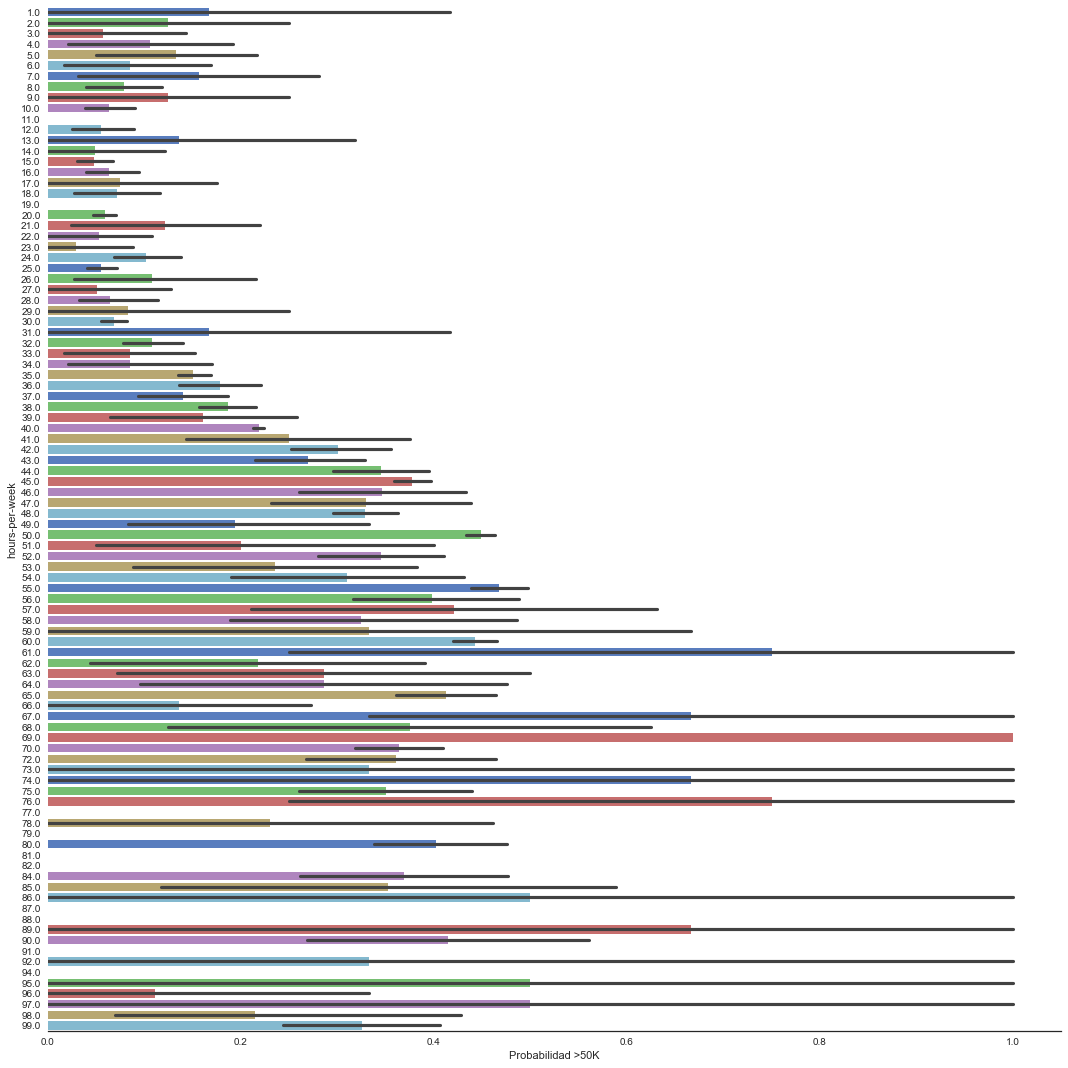

In [29]:
# Análisis exploratorio de hours-per-week vs income
g  = sns.factorplot(x= "income",y= "hours-per-week",data=df,kind="bar",size = 15,palette = "muted", orient= 'h')

g.despine(left=True)
g = g.set_xlabels("Probabilidad >50K")

* En el análisis exploratorio de hours-per-week vs income se observa que se alcanza el máximo en 69 horas,
después, la probabilidad de ganar más de 50K disminuye levemente

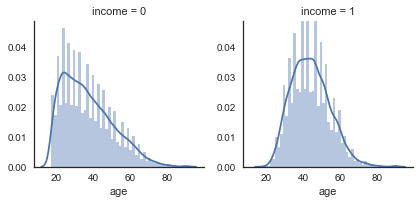

In [30]:
# Análisis exploratirio Age vs income

g = sns.FacetGrid(df, col='income')
g = g.map(sns.distplot, "age")
plt.show()

* Cuando income = 1 se observa que sigue una distribución gaussiana con respecto a age cuando los ingresos son >50K

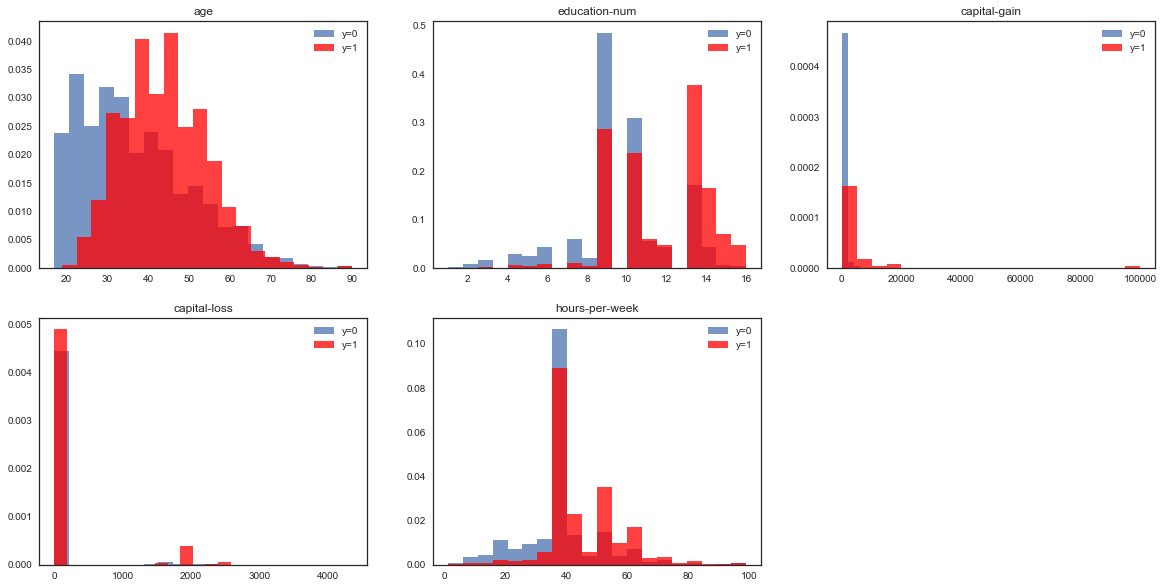

In [31]:
plt.figure(figsize=(20,10))
df1 = df[var_numericas]
idx_0 =  df1['income'] == 0
idx_1 =  df1['income'] == 1


for i,feature in enumerate(df1.columns.drop(['income'])):
    plt.subplot(2,3,i+1) 
    plt.hist(df1.ix[idx_0,feature],normed=1,bins= 20, alpha=0.75,label='y=0')
    plt.hist(df1.ix[idx_1,feature],normed=1,bins= 20, facecolor='red', alpha=0.75,label='y=1')
    plt.legend()
    plt.title(feature)

    
plt.show()

In [32]:
({'<=50K' : 0, '>50K': 1})

{'<=50K': 0, '>50K': 1}

### 1.2.1 Análisis de las variables categóricas

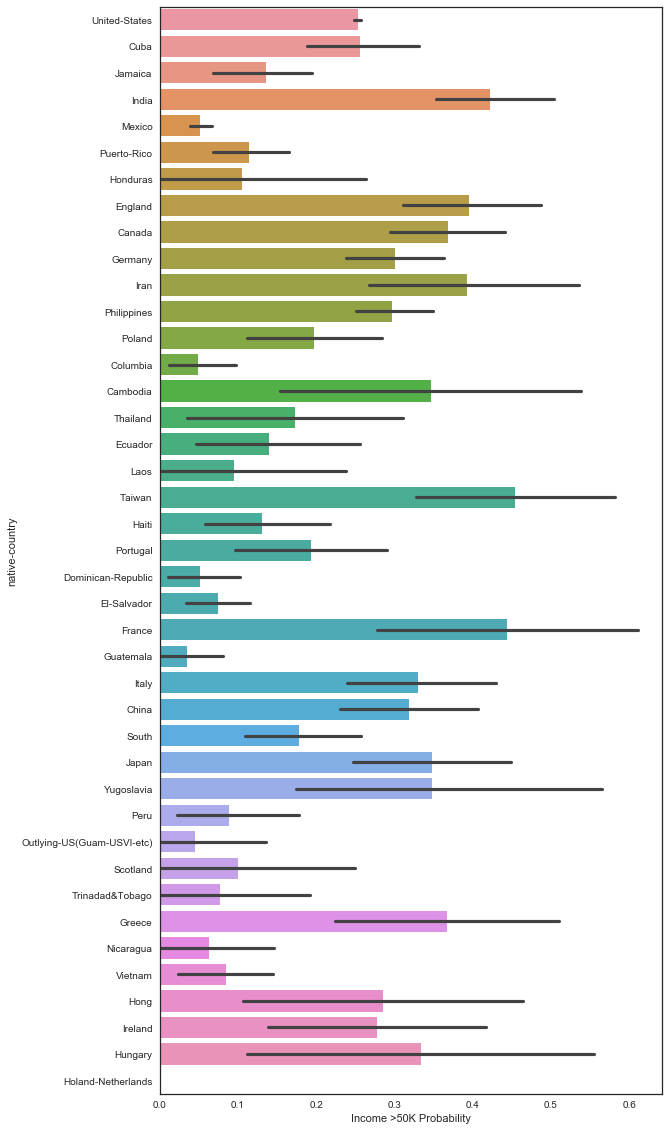

In [33]:
# Análisis exploratorio de native-country vs income

f, ax = plt.subplots(figsize=(9, 20))
g = sns.barplot(x= "income",y="native-country", data=df)
g.set_xlabel("Income >50K Probability")
plt.show()

* En el análisis exploratorio de native-country vs income, el país que tiene más probabilidad de tener unos ingresos
mayores de 50K es Taiwan
* Se observa que la probabilidad de tener más de 50K es muy dispar

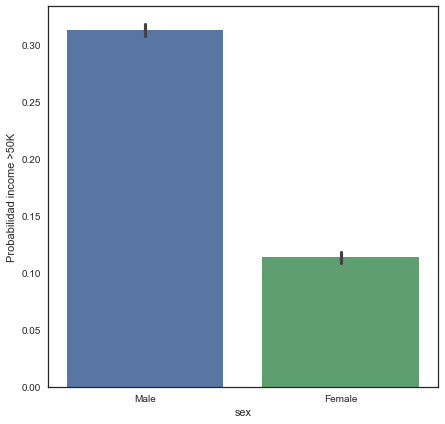

In [34]:
# Análisis exploratorio de sex vs income
f, ax = plt.subplots(figsize=(7, 7))
g = sns.barplot(x="sex",y="income",data=df)
g.set_ylabel("Probabilidad income >50K")
plt.show()

* En el análisis exploratorio de sex vs income, se observa que cuando el sexo es Male hay más probabilidades de ganar >50K

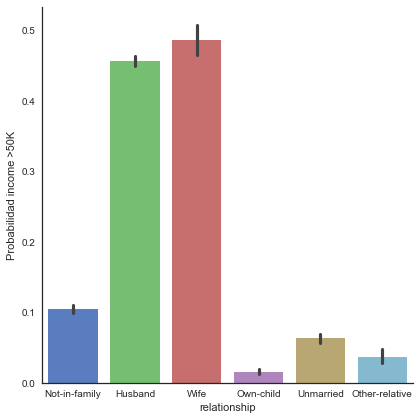

In [35]:
# Análisis exploratorio relationship vs income

g = sns.factorplot(x="relationship",y="income",data=df,kind="bar", size = 6 , palette = "muted")
g.set_ylabels("Probabilidad income >50K")
plt.show()

* En el análisis exploratorio de relationship vs income, se observa que hay más probabilidades de tener ingresos de
más de 50K cuando la relación es de marido y esposa

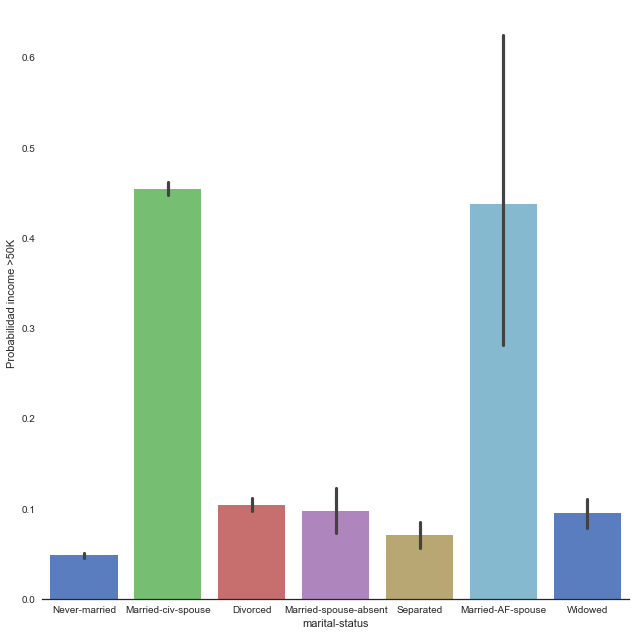

In [36]:
# Análisis exploratorio marital-status vs income 

g = sns.factorplot(x="marital-status",y="income",data=df,kind="bar", size = 9 , palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Probabilidad income >50K")
plt.show()

* En el análisis exploratorio de marital-status vs income, se observa que cuando el estado civil es:
    Married-civ-spouse y Married-AF-spouse hay más probabilidades de ganar > 50K

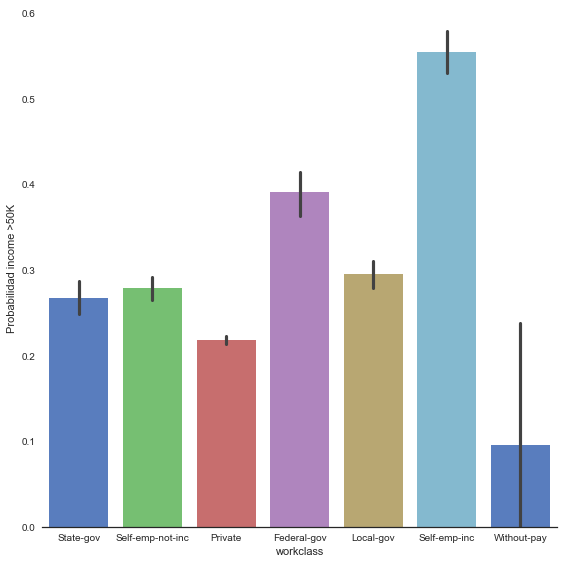

In [37]:
# Análisis exploratorio  workclass vs income

g = sns.factorplot(x="workclass",y="income",data=df,kind="bar", size = 8 , palette = "muted")
g.despine(left=True)
g.set_ylabels("Probabilidad income >50K ")
plt.show()

* En análisis exploratorio de wokclass vs income observamos que al ser Self-emp-inc hay más probabilidades
de ganar más de 50K.
* Las personas Without-pay son las que tienen menos probabilidades de ganar 50K (lógico)

## 1.3 Feature Engineering

In [38]:
# Dicotomizamos la variable 'sex' a valores 0 y 1
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})

# Creamos una nueva columna de marital-status en la dicotimizamos en estado: 'Single' y 'Married'
df['marital-status'] = df['marital-status'].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
df['marital-status'] = df['marital-status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')

# Dicotomizamos en 0/1: 'Single': 0 y 'Married': 1
df['marital-status'] = df['marital-status'].map({'Single': 0, 'Married': 1 })
df['marital-status'] = df['marital-status'].astype(int)
df.head(5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,0,Adm-clerical,Not-in-family,White,0,2174.0,0.0,40.0,United-States,0
1,50,Self-emp-not-inc,Bachelors,13.0,1,Exec-managerial,Husband,White,0,0.0,0.0,13.0,United-States,0
2,38,Private,HS-grad,9.0,0,Handlers-cleaners,Not-in-family,White,0,0.0,0.0,40.0,United-States,0
3,53,Private,11th,7.0,1,Handlers-cleaners,Husband,Black,0,0.0,0.0,40.0,United-States,0
4,28,Private,Bachelors,13.0,1,Prof-specialty,Wife,Black,1,0.0,0.0,40.0,Cuba,0


In [39]:
df2 = pd.get_dummies(df,columns =df[['workclass','education_level','occupation','relationship', 'race','native-country']], drop_first=True)
df2.head()

,age,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13.0,0,0,2174.0,0.0,40.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13.0,1,0,0.0,0.0,13.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9.0,0,0,0.0,0.0,40.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,7.0,1,0,0.0,0.0,40.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,13.0,1,1,0.0,0.0,40.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## 1.4 Modelos

### 1.4.1. Entrenamos los modelos con todas las variables

In [40]:
# Reordenamos las columnas colocando la columna 'income' la primera
cols = list(df2.columns.values)
cols.pop(cols.index('income'))
df2 = df2[['income']+cols]
#df2.head(5)

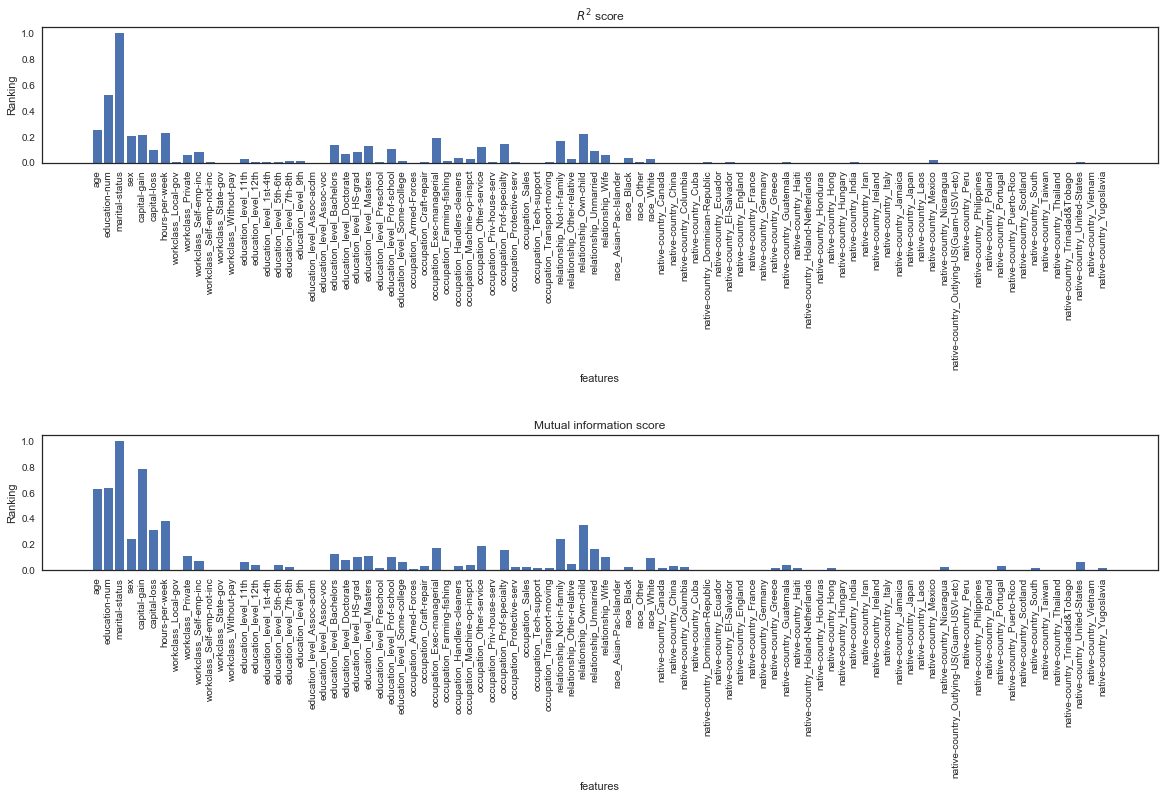

In [41]:
# Determinamos cuales son las variables significativas mediante mutual_info_classif y R^2

from sklearn.feature_selection import f_regression, f_classif,mutual_info_regression, mutual_info_classif

# convertimos el DataFrame al formato necesario para scikit-learn
data = df2.as_matrix() 

y = data[:,0:1]     # nos quedamos con la 1ª columna, price
X = data[:,1:]      # nos quedamos con el resto

feature_names = df2.columns[1:]


# do calculations
#f_test, _ = f_regression(X, y)
f_test, _ = f_classif(X, y)
f_test /= np.max(f_test)

#mi = mutual_info_regression(X, y)
mi = mutual_info_classif(X, y)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 10))
#plt.tight_layout()

plt.subplot(2,1,1)
plt.subplots_adjust(hspace=2, wspace=0)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$R^2$ score')

plt.subplot(2,1,2)
plt.bar(range(X.shape[1]),mi, align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

* En una primera aproximación podríamos quedarnos con las siguientes variables independientes:
marital-status, capital-gain, age, education-num, hours-per-week, capital-loss, sex

In [42]:
# Dividimos las población en test y train

from sklearn.model_selection import train_test_split

# preparamos los datos
features = df2.columns.drop(['income'])

X = df2[features].as_matrix()
y = df2['income'].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

print('Datos train: ', X_train.shape)
print('Datos test:  ', X_test.shape)

Datos train:  (36177, 90)
Datos test:   (9045, 90)


* Como aproximación para decidir que variables explicativas vamos a coger, vamos a usar el modelo de clasificación
Decission Tree y Bagging. A partir de estos modelos vamos a seleccionar cuales son las variables explicativas,
para a posteriori entrenar los modelos.

#### Decission Tree

best mean cross-validation score: 0.854
best parameters: {'max_depth': 10}


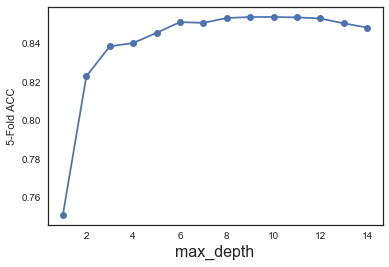

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv = 5)   # Definimos un random_state = 0 para que el árbol de decisión siempre sea el mismo
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('5-Fold ACC')
#plt.ylim((-1, 0))
plt.show()

In [45]:
dt = DecisionTreeClassifier(max_depth=8).fit(X_train,y_train)

print("Acc (Train): ",dt.score(X_train, y_train))
print("Acc (Test): ",dt.score(X_test, y_test) )

Acc (Train):  0.8565386848
Acc (Test):  0.850967385296


#### Bagging

best mean cross-validation score: 0.857
best parameters: {'max_depth': 14}


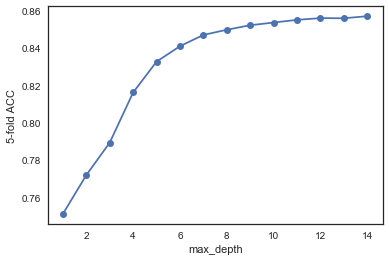

In [47]:
from sklearn.ensemble import RandomForestClassifier

# grid search
maxDepth = range(1,15)
#tuned_parameters = {'max_depth': maxDepth, n_estimators = [50,100,200]}
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=5) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('5-fold ACC')

plt.show()

In [48]:
maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestClassifier(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))

Train:  0.872349835531
Test:  0.858374792703


##### * Importancia de las variables

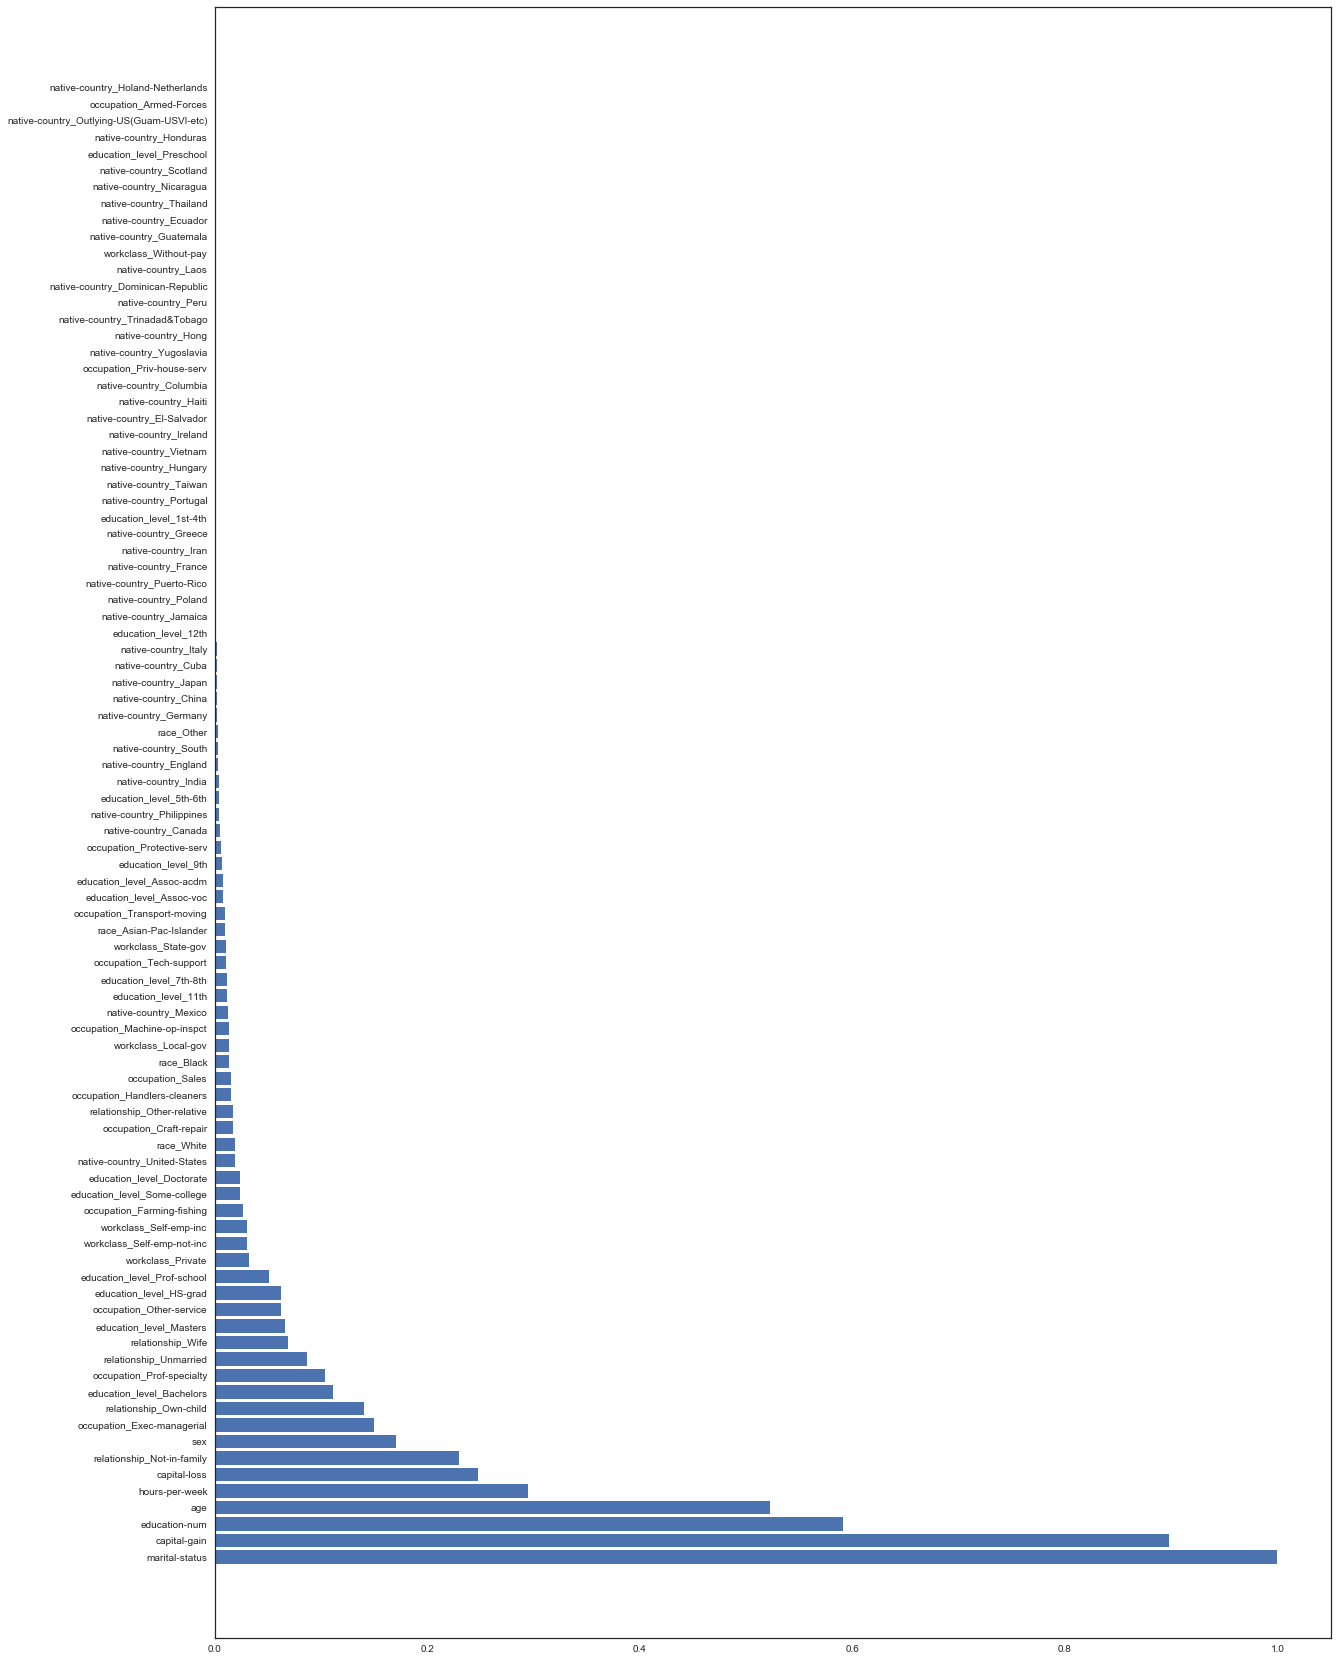

In [49]:
importances = bagModel.feature_importances_
importances = importances / np.max(importances) 

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(20,30))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])  
plt.show()

# Representamos las variables en orden de importancia

In [ ]:
from sklearn.model_selection import KFold

N,Nfeatures = X_train.shape

# Entrenamos el modelo RandomForestClassifier con los estimadores max_depth,n_estimators, max_features
# hacemos una validación cruzada
# Con esta validación cruzada vamos a hacer un ranking y lo vamos a ordenar
# Nos quedamos con distintas características y estas las vamos a ir eliminando

rf = RandomForestClassifier(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt')
kf  = KFold(n_splits=5, shuffle = True, random_state=1)
cv_error = []
cv_std = []

for nfeatures in range(Nfeatures,0,-1):
        
    error_i = []
    
    for idxTrain, idxVal in kf.split(X_train):
        
        Xt = X_train[idxTrain,:]
        yt = y_train[idxTrain]
        Xv = X_train[idxVal,:]
        yv = y_train[idxVal]
        
        rf.fit(Xt,yt)
        
        # Eliminamos caracteristicas mediante el ranking asociado a la importancia de caracteristicas
        # Este ranking lo tengo que hacer sobre el modelo entrenado con mis datos de entrenamiento
        ranking = rf.feature_importances_
        indices = np.argsort(ranking)[::-1] 
    
        selected = indices[0:(Nfeatures-nfeatures+1)]
        
        Xs = Xt[:,selected]
        
        rf.fit(Xs,yt)
        error = (1.0-rf.score(Xv[:,selected],yv))     
        error_i.append(error) 
    
    cv_error.append(np.mean(error_i))
    cv_std.append(np.std(error_i))
    
    print('# features ' + str(len(selected)) + ' error ' + str(np.mean(error_i)) + ' +/- ' + str(np.std(error_i)))
    

In [ ]:
# Realizamos la representación de CV error vs features
plt.plot(range(1,Nfeatures+1,1),cv_error,'-o')
plt.errorbar(range(1,Nfeatures+1,1), cv_error, yerr=cv_std, fmt='o')
plt.xlabel('# features')
plt.ylabel('CV error')
plt.show()

* De la representación de CV error vs # features podemos observar que a partir de entorno entre 5 y 9 características
el valor de CV error no disminuye más.
* Vamos a tomar 9 variables representativas para entrenar los modelos. Estas variables son:
 marital-status, capital-gain, education-num, age, hours-per-week, capital-loss, relationship_Not-in-family,occupation_Exec-managerial, sex

In [ ]:
# Determinamos el Accurracy cuando tenemos en cuenta todas las variables
selected_idx = indices [0:6]
rf = RandomForestClassifier(max_depth=maxDepthOptimo, n_estimators=200, max_features='sqrt')
rf.fit(X_train[:,selected_idx],y_train)

print ("Acc (train): ", rf.score(X_train[:,selected_idx], y_train))
print ("Acc (test): ", rf.score(X_test[:,selected_idx], y_test))

In [69]:
# Pasamos a dummies las variables: occupation y relationship
df3 = pd.get_dummies(df,columns =df[['occupation','relationship']], drop_first=True)
df3.head()

,age,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,income,occupation_Armed-Forces,occupation_Craft-repair,...,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,39,13.0,0,0,2174.0,0.0,40.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,50,13.0,1,0,0.0,0.0,13.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38,9.0,0,0,0.0,0.0,40.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,53,7.0,1,0,0.0,0.0,40.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,13.0,1,1,0.0,0.0,40.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [70]:
# Eliminamos las variables que no nos interesan
columnas = ['relationship_Wife', 'relationship_Own-child', 'relationship_Unmarried',
            'relationship_Other-relative', 'occupation_Handlers-cleaners',
            'occupation_Prof-specialty', 'occupation_Other-service', 'occupation_Sales',
            'occupation_Transport-moving','occupation_Farming-fishing', 'occupation_Machine-op-inspct',
            'occupation_Tech-support','occupation_Craft-repair', 'occupation_Protective-serv',
            'occupation_Armed-Forces', 'occupation_Priv-house-serv'] 
df3 = df3.drop(columnas, axis=1)
df3.head(5)

,age,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,relationship_Not-in-family
0,39,13.0,0,0,2174.0,0.0,40.0,0,0,1
1,50,13.0,1,0,0.0,0.0,13.0,0,1,0
2,38,9.0,0,0,0.0,0.0,40.0,0,0,1
3,53,7.0,1,0,0.0,0.0,40.0,0,0,0
4,28,13.0,1,1,0.0,0.0,40.0,0,0,0


In [71]:
# Reordenamos las columnas colocando la columna 'income' la primera
cols3 = list(df3.columns.values)
cols3.pop(cols3.index('income'))
df3 = df3[['income']+cols3]
df3.head(5)

,income,age,education-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,occupation_Exec-managerial,relationship_Not-in-family
0,0,39,13.0,0,0,2174.0,0.0,40.0,0,1
1,0,50,13.0,1,0,0.0,0.0,13.0,1,0
2,0,38,9.0,0,0,0.0,0.0,40.0,0,1
3,0,53,7.0,1,0,0.0,0.0,40.0,0,0
4,0,28,13.0,1,1,0.0,0.0,40.0,0,0


In [72]:
# Dividimos las población en test y train

from sklearn.model_selection import train_test_split

# preparamos los datos
features = df3.columns.drop(['income'])

X = df3[features].as_matrix()
y = df3['income'].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

print('Datos train: ', X_train.shape)
print('Datos test:  ', X_test.shape)

Datos train:  (36177, 9)
Datos test:   (9045, 9)


### 1.4.2 Entrenamos los modelos con las variables significativas

Entrenamos los modelos con las variables significativas:
> 1. Decission Tree
2. Bagging
3. Random Forest
4. Boosted Trees
5. Logistic Regression
6. Linear Discriminant Analysis
7. K-Neighbor Classifier


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



X = df3[features].as_matrix()
y = df3['income'].as_matrix()


# Vamos a estratificar el conjunto de test con respecto a las clases que quiero predecir
# Voy a intentar de mantener la misma proporción de clase 0 y clase 1 para el conjunto de entrenamiento y el conjunto de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state=0)

# Hacemos un escalado de las variables, para que no haya diferencias entre unos con otros
scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

print('Datos train: ', Xs_train.shape)
print('Datos test:  ', Xs_test.shape)

print('Propocion train:%0.3f'%np.mean(y_train))
print('Propocion test: %0.3f'%np.mean(y_test))

In [ ]:
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

In [ ]:
# Le pasamos un matriz de confusión a la función y ya me calcula las métricas
def calcula_metricas(confmat):
    
    tn, fp, fn, tp = confmat.ravel()

    acc = (tp+tn)/(tn + fp + fn + tp)
    sen = tp/(tp+fn)
    esp = tn/(tn+fp)
    ppv = tp/(tp+fp)
    fsc = 2*(sen*ppv/(sen+ppv))

    print('ACC: ', acc)
    print('SEN: ', sen)
    print('ESP: ', esp)
    print('PPV: ', ppv)
    print('FSC: ', fsc)
    
    plt.bar(range(5),[acc,sen,esp,ppv,fsc])
    plt.xticks(range(5),['ACC','SEN','ESP','PPV','FSC'])
    plt.plot([-1, 6], [1, 1], color=(0.6, 0.6, 0.6), linestyle='--')
    plt.xlim((-0.5,4.5))
    plt.ylim((0,1.1))
    plt.title('Metricas')
    plt.show()

#### 1. Decission Tree

best mean cross-validation score: 0.855
best parameters: {'max_depth': 9}


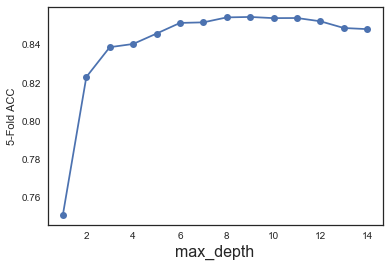

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv = 5)   # Definimos un random_state = 0 para que el árbol de decisión siempre sea el mismo
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('5-Fold ACC')
#plt.ylim((-1, 0))
plt.show()

In [74]:
dt = DecisionTreeClassifier(max_depth=8).fit(X_train,y_train)

print("Acc (Train): ",dt.score(X_train, y_train))
print("Acc (Test): ",dt.score(X_test, y_test) )

Acc (Train):  0.858915885784
Acc (Test):  0.854173576562


In [ ]:
depthOpt = grid.best_params_['max_depth']

tree = DecisionTreeClassifier(random_state=0, max_depth= depthOpt).fit(Xs_train,y_train)
y_pred = tree.predict(Xs_test)

# Calculamos la matriz de confusión
confmat_test  = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat_test)
calcula_metricas(confmat_test)

best mean cross-validation score: 0.663
best parameters: {'max_depth': 8}


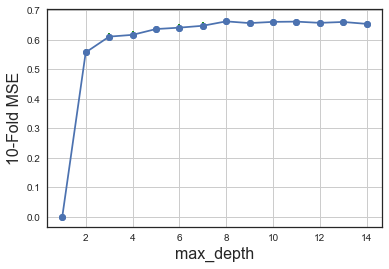

In [99]:
from sklearn.tree import DecisionTreeClassifier

maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }

grid = GridSearchCV(DecisionTreeClassifier(random_state=0),
                    scoring='f1', 
                    param_grid=param_grid, 
                    cv = 5)

grid.fit(Xs_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.plot(maxDepth,scores,'-o')
plt.errorbar(maxDepth,scores,yerr=std_scores, fmt='o',ecolor='g')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE',fontsize=16)
plt.grid()
plt.show()

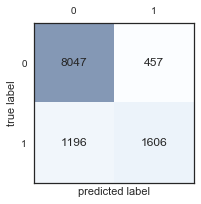

ACC:  0.853794445427
SEN:  0.573162027123
ESP:  0.946260583255
PPV:  0.778477944741
FSC:  0.66022610483


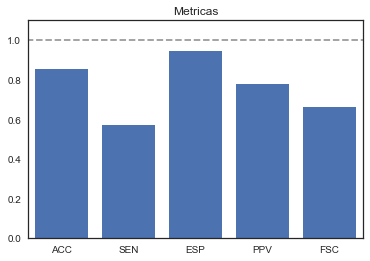

In [100]:
depthOpt = grid.best_params_['max_depth']

tree = DecisionTreeClassifier(random_state=0, max_depth= depthOpt).fit(Xs_train,y_train)
y_pred = tree.predict(Xs_test)

# Calculamos la matriz de confusión
confmat_test  = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat_test)
calcula_metricas(confmat_test)

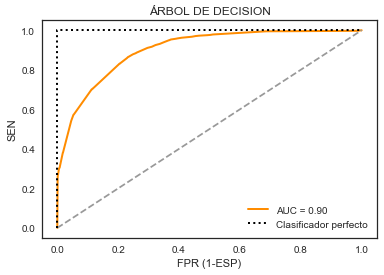

In [101]:
y_prob = tree.predict_proba(Xs_test)[:,1]

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.title('ÁRBOL DE DECISION')
plt.legend(loc="lower right")
plt.show()

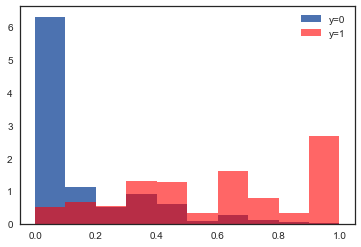

In [118]:
# Representamos esa frontera de decisión
y_prob = tree.predict_proba(Xs_test)[:,1]

idx_0 = (y_test==0)
idx_1 = (y_test==1)


plt.hist(y_prob[idx_0], normed = 1, label = 'y=0')
plt.hist(y_prob[idx_1], normed = 1, facecolor = 'r',alpha=0.6, label = 'y=1')
plt.legend(loc=1)
plt.show()

#### 2. Bagging

best mean cross-validation score: 0.858
best parameters: {'max_depth': 10}


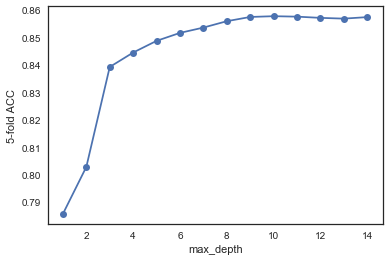

In [75]:
from sklearn.ensemble import RandomForestClassifier

# grid search
maxDepth = range(1,15)
#tuned_parameters = {'max_depth': maxDepth, n_estimators = [50,100,200]}
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=5) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('5-fold ACC')

plt.show()

In [76]:
maxDepthOptimo = grid.best_params_['max_depth']
bagModel = RandomForestClassifier(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",bagModel.score(X_train,y_train))
print("Test: ",bagModel.score(X_test,y_test))

Train:  0.865024739475
Test:  0.85671641791


#### 3. Random Forest

best mean cross-validation score: 0.858
best parameters: {'max_depth': 10}


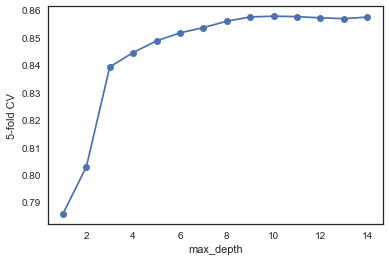

In [77]:
from sklearn.ensemble import RandomForestClassifier


# grid search
maxDepth = range(1,15)
#tuned_parameters = {'max_depth': maxDepth, n_estimators = [50,100,200]}
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators=200, max_features='sqrt'),
                    param_grid=tuned_parameters,cv=5) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('5-fold ACC')

plt.show()

In [78]:
maxDepth_opt = grid.best_params_['max_depth']
rf_clasif_model = RandomForestClassifier(max_depth= 8,
                                     n_estimators = 200, max_features = 'sqrt').fit(X_train, y_train)

print("Train : ", rf_clasif_model.score(X_train,y_train))
print("Test : ", rf_clasif_model.score(X_test,y_test))

Train :  0.859247588247
Test :  0.854947484798


best mean cross-validation score: 0.694
best parameters: {'max_depth': 14}


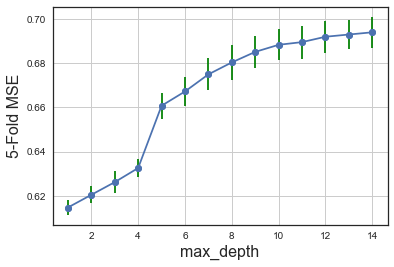

In [103]:
from sklearn.ensemble import RandomForestClassifier

# grid search
maxDepth   = range(1,15)
param_grid = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(random_state=0,n_estimators = 200, max_features='sqrt', class_weight='balanced'),
                    scoring='f1', 
                    param_grid=param_grid, 
                    cv = 5)

grid.fit(Xs_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.plot(maxDepth,scores,'-o')
plt.errorbar(maxDepth,scores,yerr=std_scores, fmt='o',ecolor='g')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('5-Fold MSE',fontsize=16)
plt.grid()
plt.show()

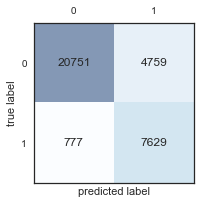

ACC:  0.836773204387
SEN:  0.907566024268
ESP:  0.813445707566
PPV:  0.615837907653
FSC:  0.733769356545


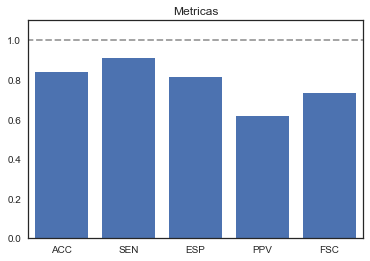

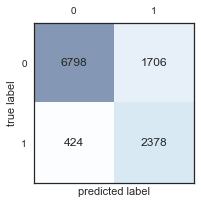

ACC:  0.81160445781
SEN:  0.848679514632
ESP:  0.799388523048
PPV:  0.582272282076
FSC:  0.690676735405


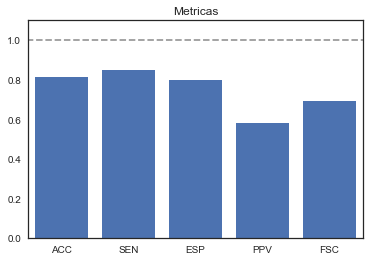

In [104]:
depthOpt = grid.best_params_['max_depth']

rf = RandomForestClassifier(random_state=0,
                            max_depth=14,
                            n_estimators = 200,
                            class_weight='balanced',
                            max_features='sqrt').fit(Xs_train,y_train)

y_pred_train = rf.predict(Xs_train)
y_pred_test  = rf.predict(Xs_test)

confmat_train  = confusion_matrix(y_train, y_pred_train)
plot_confusion_matrix(confmat_train)
calcula_metricas(confmat_train)

confmat_test  = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(confmat_test)
calcula_metricas(confmat_test)

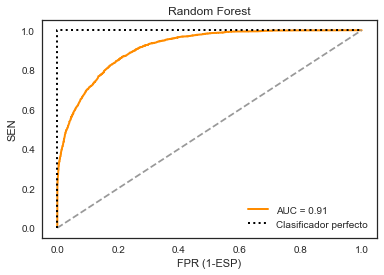

In [105]:
y_prob = rf.predict_proba(Xs_test)[:,1]

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.title('Random Forest')
plt.legend(loc="lower right")
plt.show()

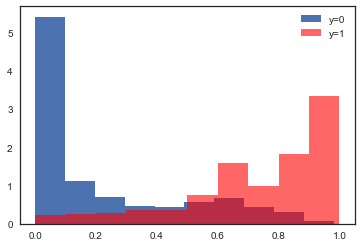

In [106]:
y_prob = rf.predict_proba(Xs_test)[:,1]

idx_0 = (y_test==0)
idx_1 = (y_test==1)

# your code here
plt.hist(y_prob[idx_0], normed = 1, label = 'y=0')
plt.hist(y_prob[idx_1], normed = 1, facecolor = 'r',alpha=0.6, label = 'y=1')
plt.legend(loc=1)
plt.show()

#### 4. Boosted Trees

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

Niterations = [25,50,75,100,125,150,175,200,250]   # El nº de iteraciones dependen del problema
learningRate = [0.5,0.1,0.05,0.01]   #Las tasas de aprendizaje es un valor pequeño y positivo
# mantenemos max_depth estático: max_depth=2

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingClassifier(random_state=0, max_depth=8), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.862
best parameters: {'learning_rate': 0.05, 'n_estimators': 100}


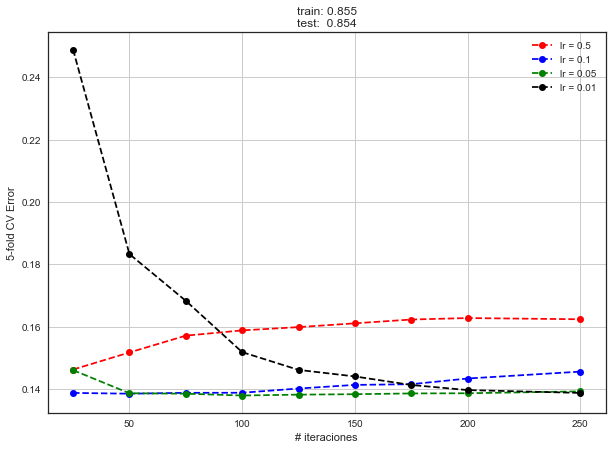

In [88]:
# calculamos métricas globales
bt = GradientBoostingClassifier(random_state=0, max_depth=8,learning_rate= 0.01, n_estimators= 100)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
plt.figure(figsize=(10,7))
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

#### 5. Logistic Regression

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



X = df3[features].as_matrix()
y = df3['income'].as_matrix()


# Vamos a estratificar el conjunto de test con respecto a las clases que quiero predecir
# Voy a intentar de mantener la misma proporción de clase 0 y clase 1 para el conjunto de entrenamiento y el conjunto de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state=0)

# Hacemos un escalado de las variables, para que no haya diferencias entre unos con otros
scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

print('Datos train: ', Xs_train.shape)
print('Datos test:  ', Xs_test.shape)

print('Propocion train:%0.3f'%np.mean(y_train))
print('Propocion test: %0.3f'%np.mean(y_test))

Datos train:  (33916, 9)
Datos test:   (11306, 9)
Propocion train:0.248
Propocion test: 0.248


In [143]:
from sklearn.linear_model import LogisticRegression

# Calculamos ahora un algoritmo de regresión logística
lr = LogisticRegression(C=1).fit(Xs_train,y_train)
y_pred = lr.predict(Xs_train)

print("Train : ", lr.score(Xs_train,y_train))
print("Test : ", lr.score(Xs_test,y_test))

Train :  0.839190942328
Test :  0.838758181497


In [144]:
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

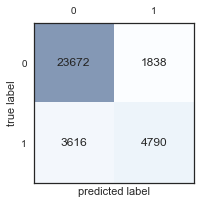

In [145]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_train,y_pred)
plot_confusion_matrix(confmat)

# Podemos acceder a los valores de la matriz
tn, fp, fn, tp = confusion_matrix(y_train,y_pred).ravel()

ACC:  0.839190942328
SEN:  0.569831073043
ESP:  0.927949823599
PPV:  0.722691611346
FSC:  0.637222296129


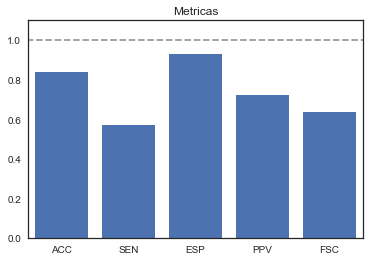

In [147]:
calcula_metricas(confmat)

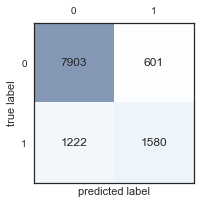

ACC:  0.838758181497
SEN:  0.563882940757
ESP:  0.929327375353
PPV:  0.724438331041
FSC:  0.634156130845


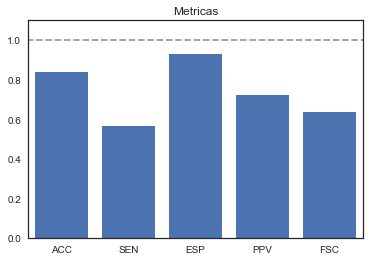

In [148]:
y_pred_test = lr.predict(Xs_test)

confmat = confusion_matrix(y_test,y_pred_test)
plot_confusion_matrix(confmat)
calcula_metricas(confmat)

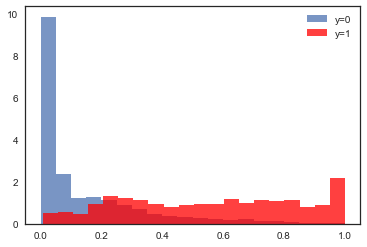

In [149]:
y_prob = lr.predict_proba(Xs_test)[:,1]

idx_0 = (y_test==0)
idx_1 = (y_test==1)


plt.hist(y_prob[idx_0],normed=1, bins = 20, alpha=0.75,label='y=0')
plt.hist(y_prob[idx_1],normed=1, bins = 20, facecolor='red', alpha=0.75,label='y=1')
plt.legend()
plt.show()

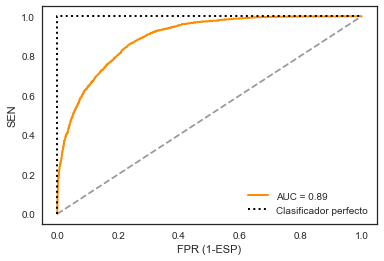

In [150]:
from sklearn.metrics import roc_curve, auc

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

#### 6. Linear Discriminant Analysis

In [156]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Calculamos ahora un algoritmo de regresión logística
lda = LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=9, store_covariance=False, tol=0.0001).fit(Xs_train,y_train)
y_pred = lda.predict(Xs_train)

print("Train : ", lda.score(Xs_train,y_train))
print("Test : ", lda.score(Xs_test,y_test))

Train :  0.829136690647
Test :  0.83053246064


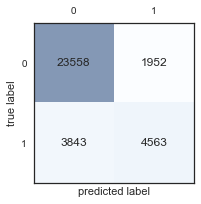

In [157]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_train,y_pred)
plot_confusion_matrix(confmat)

# Podemos acceder a los valores de la matriz
tn, fp, fn, tp = confusion_matrix(y_train,y_pred).ravel()

ACC:  0.829136690647
SEN:  0.542826552463
ESP:  0.923480987848
PPV:  0.700383729854
FSC:  0.611621205013


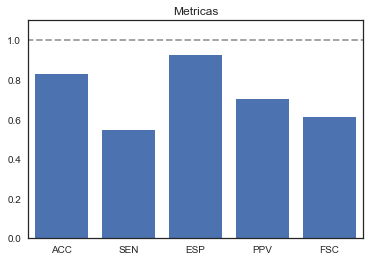

In [159]:
calcula_metricas(confmat)

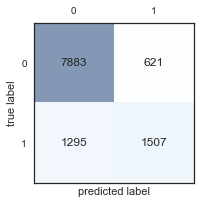

ACC:  0.83053246064
SEN:  0.537830121342
ESP:  0.926975540922
PPV:  0.708176691729
FSC:  0.611359026369


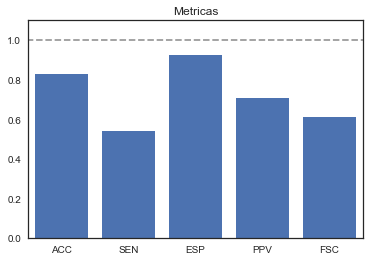

In [160]:
y_pred_test = lda.predict(Xs_test)

confmat = confusion_matrix(y_test,y_pred_test)
plot_confusion_matrix(confmat)
calcula_metricas(confmat)

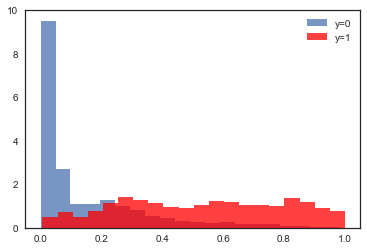

In [161]:
y_prob = lda.predict_proba(Xs_test)[:,1]

idx_0 = (y_test==0)
idx_1 = (y_test==1)


plt.hist(y_prob[idx_0],normed=1, bins = 20, alpha=0.75,label='y=0')
plt.hist(y_prob[idx_1],normed=1, bins = 20, facecolor='red', alpha=0.75,label='y=1')
plt.legend()
plt.show()

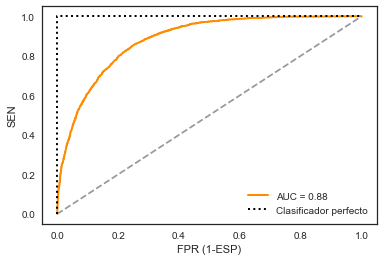

In [162]:
from sklearn.metrics import roc_curve, auc

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

#### 7. K-Neighbor Classifier

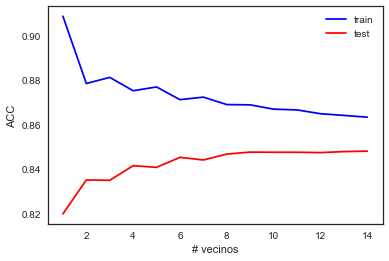

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 0)

# inicializamos
neighbors = range(1,15)
acc_train = []
acc_test  = []

for n in neighbors:
    
    
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)  
   
    
    acc_train.append(knn.score(X_train, y_train))
    acc_test.append(knn.score(X_test, y_test))
    

plt.plot(neighbors,acc_train,'b',label='train')
plt.plot(neighbors,acc_test,'r',label='test')
plt.legend()
plt.xlabel('# vecinos')
plt.ylabel('ACC')
plt.show()

In [133]:
from sklearn.model_selection import StratifiedKFold

# recordemos que este es nuestro conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 0)

nFolds = 5
kf  = StratifiedKFold(n_splits = nFolds, shuffle = True, random_state=0)

nVecinos = range(1,16) # [1-15] Esto es un vector que varía entre 1 y 16

# inicializamos una matriz de errores, para cada valor de n_neighbors y cada iteración del algoritmo de cross-validation
# - tantas filas como número de folds
# - tantas columnas como valores de alphaVector
accMatriz = np.zeros((nFolds,len(nVecinos))) 

j = 0 # inicializamos contador de columnas
for n in nVecinos:
       
    knn = KNeighborsClassifier(n_neighbors = n)
    
    i = 0 # inicializamos contador de filas
    for idxTrain, idxVal in kf.split(X_train,y_train):    # Devuelve unos indices asociados a entrenamiento y unos indices asociados a validación
      
        Xt = X_train[idxTrain,:]
        yt = y_train[idxTrain]
        Xv = X_train[idxVal,:]
        yv = y_train[idxVal]
        
        knn.fit(Xt,yt)
        accMatriz[i,j] = knn.score(Xv, yv) 
        
        i+=1
    j+=1

accVector = np.mean(accMatriz,axis=0)
accStd = np.std(accMatriz,axis=0)

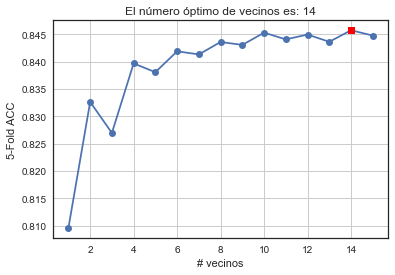

In [134]:
# Calculamos el valor óptimo
idx = np.argmax(accVector)
nOpt = nVecinos[idx]

plt.plot(nVecinos,accVector,'-o')
plt.plot(nVecinos[idx],accVector[idx],'rs')
plt.title('El número óptimo de vecinos es: %d' % nOpt)
plt.xlabel('# vecinos')
plt.ylabel('5-Fold ACC')
plt.grid()
plt.show()

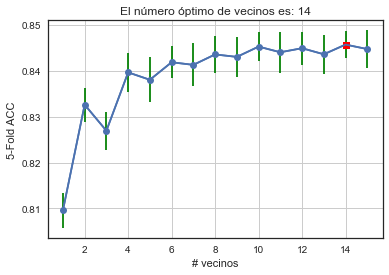

In [135]:
plt.plot(nVecinos,accVector,'-o')
plt.plot(nVecinos[idx],accVector[idx],'rs')
plt.errorbar(nVecinos, accVector, yerr=accStd, ecolor='g')
plt.title('El número óptimo de vecinos es: %d' % nOpt)
plt.xlabel('# vecinos')
plt.ylabel('5-Fold ACC')
plt.grid()
plt.show()
#Estamos estimando el promedio del error. Error promedio vs vecinos
# Lo verde es la desviación típica

In [140]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train,y_train)

print("accuracy train: {:.2f}".format(knn.score(X_train, y_train)))
print("accuracy test: {:.2f}".format(knn.score(X_test, y_test)))

accuracy train: 0.87
accuracy test: 0.85


In [151]:

# Calculamos ahora un algoritmo de regresión logística
knn = KNeighborsClassifier(n_neighbors = 8).fit(Xs_train,y_train)
y_pred = lr.predict(Xs_train)

print("Train : ", lr.score(Xs_train,y_train))
print("Test : ", lr.score(Xs_test,y_test))

Train :  0.839190942328
Test :  0.838758181497


ACC:  0.838758181497
SEN:  0.563882940757
ESP:  0.929327375353
PPV:  0.724438331041
FSC:  0.634156130845


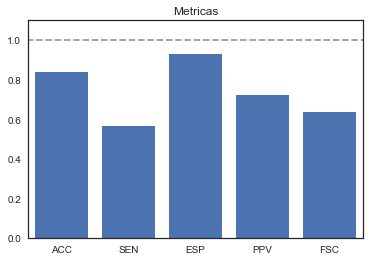

In [152]:
calcula_metricas(confmat)

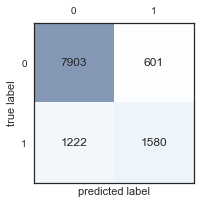

ACC:  0.838758181497
SEN:  0.563882940757
ESP:  0.929327375353
PPV:  0.724438331041
FSC:  0.634156130845


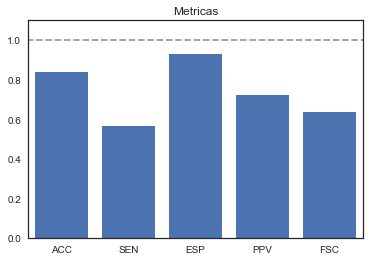

In [153]:
y_pred_test = lr.predict(Xs_test)

confmat = confusion_matrix(y_test,y_pred_test)
plot_confusion_matrix(confmat)
calcula_metricas(confmat)

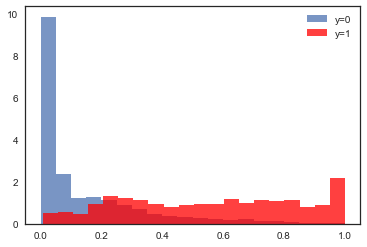

In [164]:
y_prob = lr.predict_proba(Xs_test)[:,1]

idx_0 = (y_test==0)
idx_1 = (y_test==1)


plt.hist(y_prob[idx_0],normed=1, bins = 20, alpha=0.75,label='y=0')
plt.hist(y_prob[idx_1],normed=1, bins = 20, facecolor='red', alpha=0.75,label='y=1')
plt.legend()
plt.show()

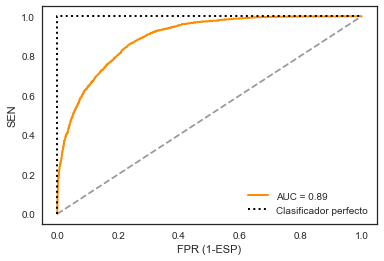

In [155]:
from sklearn.metrics import roc_curve, auc

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

## 1.5 Conclusiones

* Con las siguientes variables explicativas: marital-status, capital-gain, education-num, age, hours-per-week, capital-loss,
relationship_Not-in-family,occupation_Exec-managerial, sex; conseguimos determinar la probabilida de ganar más de 50K.
* El modelo ganador ha sido Random Forest (RF), ya que en función de las métricas que hemos utilizado para comparar los 
distintos modelos, RF ha obtenido un valor mayor de area bajo la curva en la curva ROC (0.91). Por otra parte los valores de
precisión que se obtienen en entrenamiento (0.859247588247) y test (0.854947484798) son elevados y muy similares.

Otra métrica que hemos utilizado son: sensibilidad (SEN), especificidad (ESP), precisión (PPV), FSC observando que dichos 
valores en el modelo que hemos aplicado son equilibrados, obteniendo buenos valores de precisión (Accuracy).

Pros: 
> - Es fácil de interpretar y de explicar a personas sin conocimientos de machine learning.

Contra:
> - Al aplicar dicho modelo existe riesgo de overfitting


# 2. Problema de regresión

* ### Objetivo:
> Predecir el precio (price) de un diamante a partir de un conjunto de propiedades físicas del diamante.

## 2.1 Análisis exploratorio

In [1]:
# Importamos las librería de: Numpy, Panda, MatplotLib y Seaborn

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')


import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

In [2]:
# Cargamos los datos
data2 = pd.read_csv('diamonds.csv', sep=',', decimal='.')


In [3]:
# Miramos como es la cabecera de la tabla
data2.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# Miramos como son los últimos datos de la tabla
data2.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [5]:
# Caracterizamos los valores numéricos
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [6]:
# Vemos las dimensiones de la tabla
data2.shape

(53940, 11)

In [7]:
# Miramos de que tipo son los datos
data2.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [8]:
# Sacamos los valores únicos de las columnas que tienen variables categóricas
data2['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [9]:
data2['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [10]:
data2['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'], dtype=object)

In [11]:
# Miramos en los datos si hay valores nulos
df_diamond = pd.DataFrame(data2)

df_diamond.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [12]:
# Comprobamos si hay null
df_diamond.isnull().any().any()

False

In [13]:
df_diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [14]:
# Eliminamos la variable Unnamed: 0
columnas_d = ['Unnamed: 0']
df_diamond = df_diamond.drop(columnas_d, axis=1)
df_diamond.head(5)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


* Eliminamos la columna 'Unnamed: 0', porque ya tenmemos el índice

Tenemos dos tipos de variables:
    
> 1. Variables numéricas: carat, depth, table, price, x, y, z
2. Variables categóricas ordinales: cut, color, clarity
    

### 2.1.1 Caracterización de las varibles categóricas

#### 1. Cut

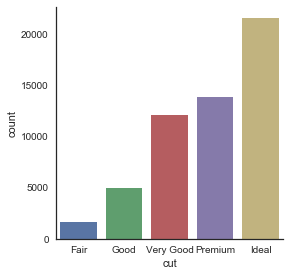

In [15]:
sns.factorplot(x='cut', data=df_diamond, kind='count', order=['Fair','Good','Very Good','Premium','Ideal'])

* Se observa que hay más diamantes con corte Ideal

**Price vs Cut**

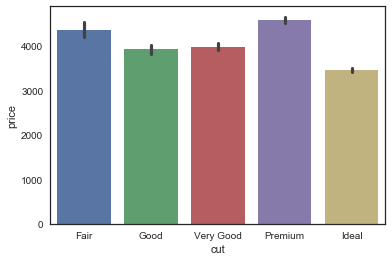

In [16]:
sns.barplot(x = 'cut', y = 'price',order=['Fair','Good','Very Good','Premium','Ideal'],data=df_diamond)

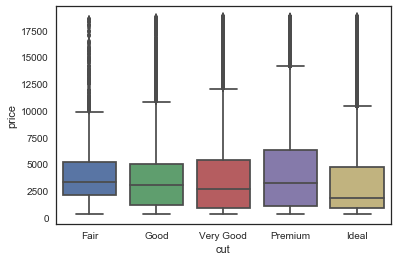

In [17]:
sns.boxplot(x = 'cut', y= 'price',data= df_diamond, order=['Fair','Good','Very Good','Premium','Ideal'] )

* En la representación de Price vs Cut se observa que los diamantes más caros son Premium seguidos de los diamantes
Very good en cuanto a corte.

#### 2. Color

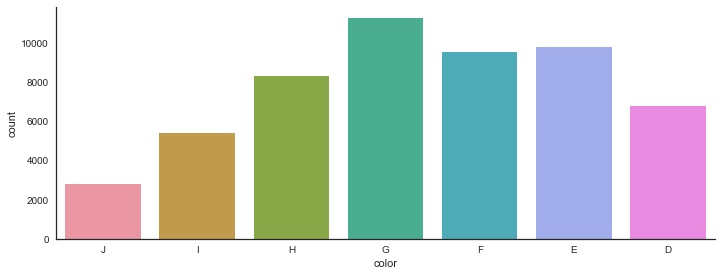

In [18]:
sns.factorplot(x='color', data=df_diamond ,order=['J','I','H','G','F','E','D'], kind='count',aspect=2.5 )

* En la representación del conteo de diamantes vs al color, se observa que hay más diamantes de color G (casi incoloro)
que de color D (incoloro)

**Color vs Price**

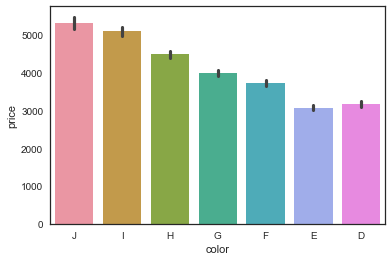

In [19]:
sns.barplot(x = 'color', y = 'price', order=['J','I','H','G','F','E','D'], data=df_diamond)

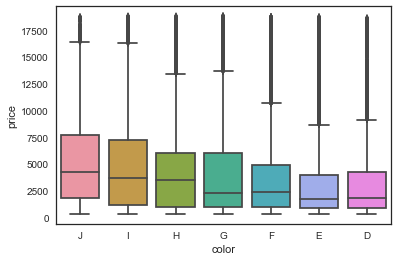

In [20]:
sns.boxplot(x = 'color', y= 'price',data= df_diamond, order=['J','I','H','G','F','E','D'] )

* En la representación de Price vs Color y en el box plot de Price a Color, se observa que los diamantes
de color J (peor color) son más caros y tienen más margen de precio que los diamantes con color D
(mejor color, es decir incoloros en la esca de gradación de color)

#### 3. Clarity

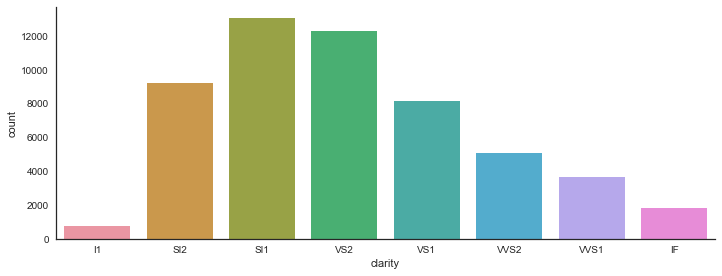

In [21]:
sns.factorplot(x='clarity', data=df_diamond ,order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'], kind='count',aspect=2.5 )

* En la representación del conteo de diamantes vs clarity se observa que hay más diamantes de clarity
SI1 y VSI2 (existen imperfecciones en el interior del diamante) que diamantes del tipo IF(sin imperfecciones en el interior)
de los cuales hay muy pocos diamantes.

**Price vs Clarity**

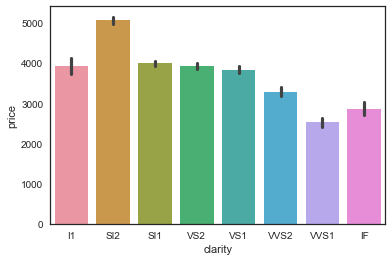

In [22]:
sns.barplot(x = 'clarity', y = 'price', order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'], data=df_diamond)

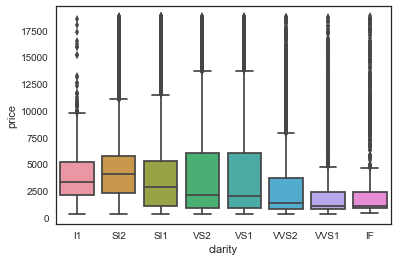

In [23]:
sns.boxplot(x = 'clarity', y= 'price',data= df_diamond, order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'])

* En la representación en diagramas de barras de Clarity vs price y en la representación en forma de box-plot de
price vs clarity, se observa que los diamantes con clarity VS2 y VS1 tiene más margén de precio y más caros que los
diamantes que tienen mejor claridad de tipo IF cuyo margén de precio es más bajo y menor precio comparado con los 
diamantes de tipo VS2 y VS1.

* Codificamos las variables categóricas ordinales: cut, color, clarity

In [24]:
df_diamond['cut'] = df_diamond['cut'].map({'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal':5 })
df_diamond['color'] = df_diamond['color'].map({'J': 1,'I': 2,'H': 3,'G': 4,'F': 5,'E': 6,'D': 7})
df_diamond['clarity'] = df_diamond['clarity'].map({'I1': 1,'SI2': 2,'SI1': 3,'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8})
df_diamond.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


### 2.1.2 Caracterización de las varibles numéricas

#### 1. Carat

Text(0.5,0,'carat')

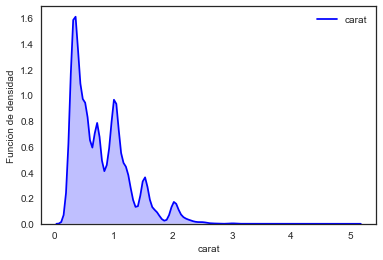

In [25]:
sns.kdeplot(df_diamond['carat'], shade=True, color='b')
plt.ylabel('Función de densidad', fontsize=10)
plt.xlabel('carat', fontsize=10)

* En la representación de la función de densidad vs carat, se observa que entorno a un carat 0.2 existe mayor 
probabilidad de tener dichos valores de carat.
* Se observan 4 máximos relativos de función de densidad.

**Price vs Carat**

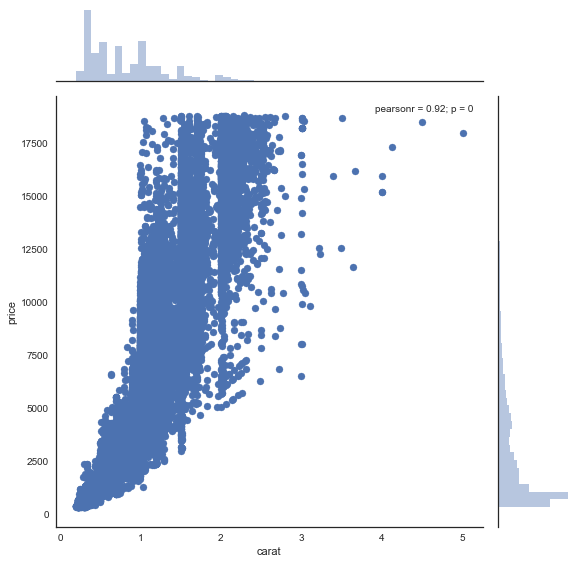

In [26]:
sns.jointplot(x='carat' , y='price' , data=df_diamond , size=8)

* En la representación de los puntos de price vs carat represetado conjuntamente con los histogramas marginales,
se observa que carat varia con el precio de manera exponencial.

#### 2. Depth

Text(0.5,0,'depth (mm)')

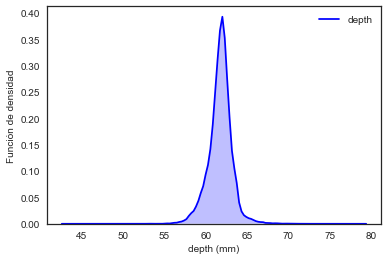

In [27]:
sns.kdeplot(df_diamond['depth'],shade=True, color='blue')
plt.ylabel('Función de densidad', fontsize=10)
plt.xlabel('depth (mm)', fontsize=10)

* En la representación de la Funciónde densidad vs depth, se observa un máximo de probabilidad entorno a 62 mm de depth.
* La función deprobabilidad sigue una función de distribución de tipo gaussiana.

**Price vs Depth**

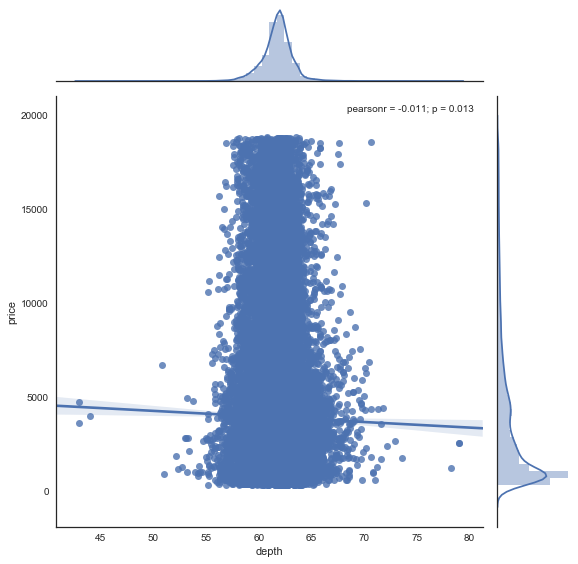

In [28]:
sns.jointplot(x='depth', y='price', data= df_diamond, kind='regplot', size=8)

* En la representación conjunta de los puntos de price vs depth teniendo en cuenta los histogramas marginales,
podemos inferir que el precio puede variar fuertemente para la misma depth.
* El coeficiente de Pearson negativo (p= -0.011) nos muestra que existe una relación inversa entre el precio y el depth

#### 3. Table

Text(0.5,0,'table')

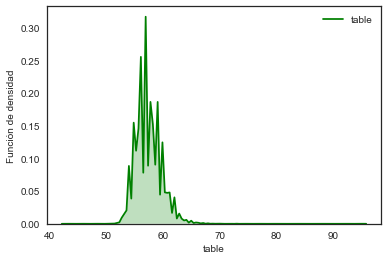

In [29]:
sns.kdeplot(df_diamond['table'],shade=True, color='green')
plt.ylabel('Función de densidad', fontsize=10)
plt.xlabel('table', fontsize=10)

* En la representación de la función de desidad vs table, se observa una mayor densidad de 
probabilidad para un valor de table = 58.
* Se observa, también, una serie de máximos relativos de densidad de probabilidad menores a 58 
y mayores a 58. Se puede decir que la distribución es multimodal.

**Table vs Price**

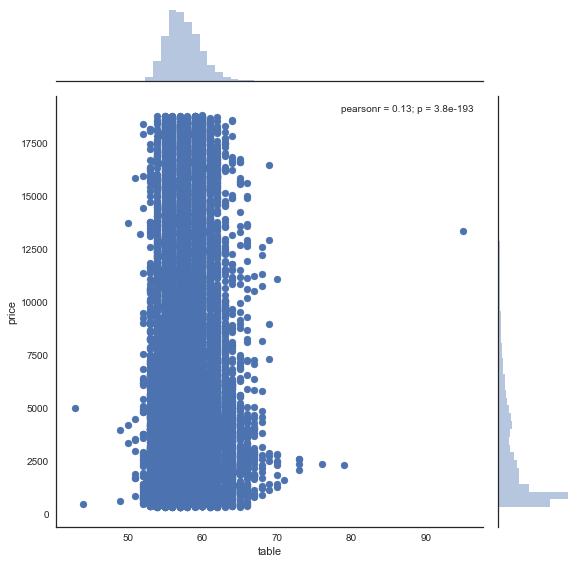

In [30]:
sns.jointplot(x='table', y='price', data=df_diamond, size=8)

* En la representación conjunta de los puntos de price vs table teniendo en cuenta los histogramas marginales,
podemos inferir que el precio puede variar fuertemente para un mismo table.
* El coeficiente de Pearson positivo (p= 0.13) nos muestra que existe cierta relación directa
positiva entre el price y table.

#### 4. x, y, z (Dimensiones)

(2, 10)

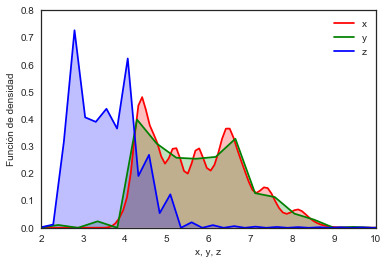

In [31]:
sns.kdeplot(df_diamond['x'], shade=True, color='r')
sns.kdeplot(df_diamond['y'], shade=True, color='g')
sns.kdeplot(df_diamond['z'], shade=True, color='b')

plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
plt.ylabel('Función de densidad', fontsize=10)
plt.xlabel('x, y, z', fontsize=10)

plt.xlim(2,10)

* En la representación de la función de probabilidad vs las dimensiones x,y,z se observa que
las distintas funciones de probabilidad para las distintas dimensiones se solapan, teniendo
máximos relativos de la función de densidad de probabilidad para las distintas dimensiones.
* También, se observa que la función de densidad de probabilidad tiene alcanza un valor máximo 
entorno a 2.8 para la función de densidad de probabilidad de la variable x.
* Se observa para la dimensión y y que el máximo de densidad de probabilidad es entorno a 4.2
* Se observa para la dimensión y y que el máximo de densidad de probabilidad es entorno a 4.5

### 2.1.3 Grado de correlación de las variables

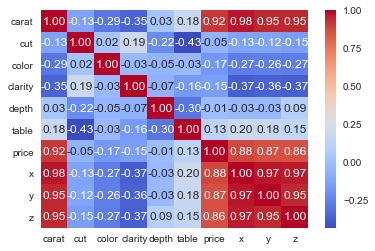

In [32]:
# Representación de la matriz de correlaciones
g1 = sns.heatmap(df_diamond.corr(),annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

En la matriz de correlaciones podemos observar:
> 1. Existe una fuerte correlación entre las diferentes dimensiones.
2. Existe una fuerte correlación entre carat y las diferentes dimensiones: x,y,z

## 2.2 Feature Engineering

### 2.2.1 Creación de una nueva variable volumen

In [33]:
# Creamos una nueva variable volumen  que engloba todas las dimensiones
df_diamond['volumen'] = df_diamond['x'] * df_diamond['y'] * df_diamond['z']
df_diamond.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,volumen
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [34]:
df_diamond.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40000,0.700000,1.040000,5.01000
cut,53940.0,3.904097,1.116600,1.0,3.00000,4.000000,5.000000,5.00000
color,53940.0,4.405803,1.701105,1.0,3.00000,4.000000,6.000000,7.00000
clarity,53940.0,4.051020,1.647136,1.0,3.00000,4.000000,5.000000,8.00000
depth,53940.0,61.749405,1.432621,43.0,61.00000,61.800000,62.500000,79.00000
table,53940.0,57.457184,2.234491,43.0,56.00000,57.000000,59.000000,95.00000
price,53940.0,3932.799722,3989.439738,326.0,950.00000,2401.000000,5324.250000,18823.00000
x,53940.0,5.731157,1.121761,0.0,4.71000,5.700000,6.540000,10.74000
y,53940.0,5.734526,1.142135,0.0,4.72000,5.710000,6.540000,58.90000
z,53940.0,3.538734,0.705699,0.0,2.91000,3.530000,4.040000,31.80000


#### 2.2.1.1 Caracterización de la variable volumen

* Vamos a ver la distribución que tienen los diamantes con respecto al volumen

(0, 50000)

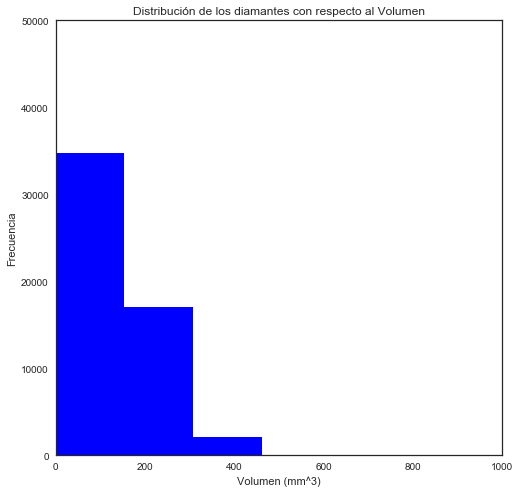

In [35]:
plt.figure(figsize=(8,8))
plt.hist( x=df_diamond['volumen'] , bins=25 ,color='b')
plt.xlabel('Volumen (mm^3)')
plt.ylabel('Frecuencia')
plt.title('Distribución de los diamantes con respecto al Volumen')
plt.xlim(0,1000)
plt.ylim(0,50000)

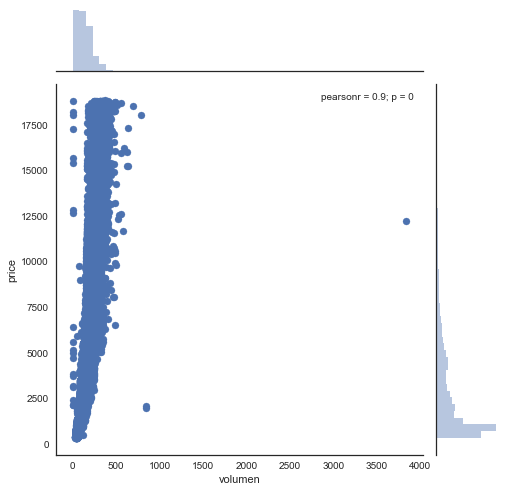

In [36]:
sns.jointplot(x='volumen', y='price', data= df_diamond, size=7)

* En la representación conjunta de los puntos junto con los histogramas marginales, se 
observa que tiene un elevado valor del coeficiente de correlación de Pearson. Por lo que 
podemos concluir que parece que haya una relación lineal entre el precio y el volumen.

Eliminamos las variables: x,y,z ya que las tenemos incluidas en la variable volumen:

In [37]:
df_diamond.drop(['x', 'y', 'z'], axis=1, inplace=True)
df_diamond.head(5)

,carat,cut,color,clarity,depth,table,price,volumen
0,0.23,5,6,2,61.5,55.0,326,38.202030
1,0.21,4,6,3,59.8,61.0,326,34.505856
2,0.23,2,6,5,56.9,65.0,327,38.076885
3,0.29,4,2,4,62.4,58.0,334,46.724580
4,0.31,2,1,2,63.3,58.0,335,51.917250


* Vamos a ver cual es la correlación que tienen las distintas variables
teniendo en cuenta el volumen y habiendo descartado las variables de dimensión:

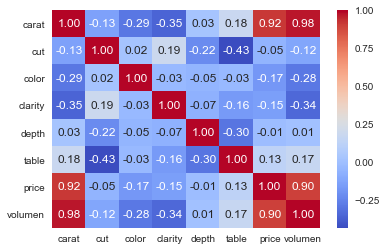

In [38]:
g2 = sns.heatmap(df_diamond.corr(),annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

* En la matriz de correlaciones observamos:

> 1. Una fuerte correlación entre el volumen y carat
2. Una fuerte correlación entre el volumen y el precio

### 2.2.2 Selección de características

Vamos a ver cuales son las variables explicativas en la determinación del precio de los diamantes:

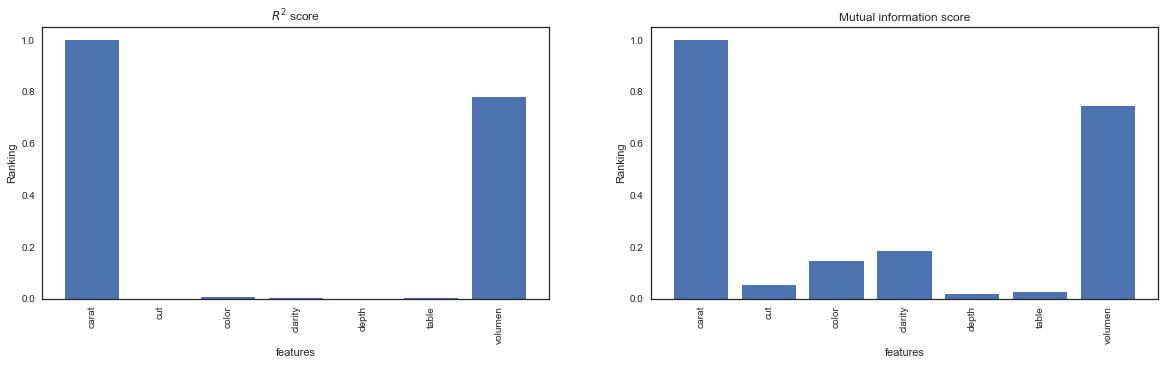

In [39]:
# convertimos el DataFrame al formato necesario para scikit-learn
from sklearn.feature_selection import f_regression, mutual_info_regression


data = df_diamond.as_matrix() 

X = df_diamond.drop(['price'], axis=1)
y = df_diamond['price']

feature_names = X.columns[:]


# do calculations
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$R^2$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi, align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

* De la representación de Ranking vs features para Mutual information el orden de importancia de las variables es:

> carat, volumen, clarity, color, cut, table, depth

### 2.2.3 Feature Scaling

* Dividimos el dataset en Train y en Test, de tal manera que hacemos un Train con el modelo y una predicción con
los valores de Test.
* Aplicamos feature scaling, aunque no sea necesario

In [40]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Imputer, LabelEncoder

X = df_diamond.drop(['price'], axis=1)
y = df_diamond['price']

# Dividimos los datos en entrenamiento y test (80 training, 20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 2)

In [41]:
print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)    # La estandarización se hace sobre el conjunto de datos de train y después se pasa a test
XtrainScaled = scaler.transform(X_train)
XtestScaled = scaler.transform(X_test)

Datos entrenamiento:  (40455, 7)
Datos test:  (13485, 7)


best mean cross-validation score: -1534851.439
best parameters: {'alpha': 0.10000000000000001}


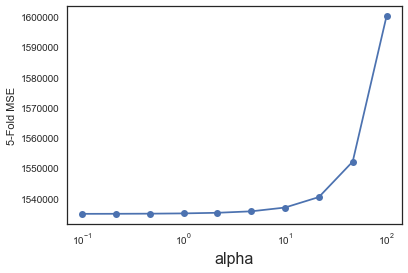

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,2,10,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

best mean cross-validation score: -1534851.439
best parameters: {'alpha': 0.10000000000000001}


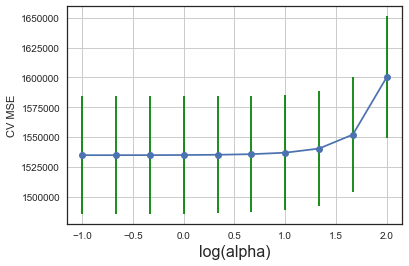

In [43]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.errorbar(np.log10(alpha_vector),scores,yerr=std_scores, fmt='o-',ecolor='g')
plt.xlabel('log(alpha)',fontsize=16)
plt.ylabel('CV MSE')
plt.grid()
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error

#alpha_optimo = grid.best_params_['alpha']
alpha_optimo = 10*1000
lasso = Lasso(alpha = alpha_optimo).fit(X_train,y_train)

ytrainLasso = lasso.predict(X_train)
ytestLasso  = lasso.predict(X_test)

mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

features = X
w = lasso.coef_
for f,wi in zip(features,w):
    print(f,wi)

MSE Modelo Lasso (train): 3.16e+06
MSE Modelo Lasso (test) : 2.48e+06
carat 0.0
cut 0.0
color 0.0
clarity 0.0
depth -0.0
table -0.0
volumen 43.7648129817


* Con un alfa = 0.1 las variables explicativas son: carat, cut, color, clarity, volumen
* Con un alfa = 1 las variables explicativas son: clarity, volumen
* Con un alfa = 10 las variables explicativas son: volumen


In [45]:
from sklearn.metrics import mean_squared_error

#alpha_optimo = grid.best_params_['alpha']*1000
alpha_optimo = 1*1000
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
#mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
#mseTestModelLasso = mean_squared_error(y_test,ytestLasso)
mseTrainModelLasso = np.sqrt(mean_squared_error(y_train,ytrainLasso))
mseTestModelLasso = np.sqrt(mean_squared_error(y_test,ytestLasso))

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 1.84e+03
MSE Modelo Lasso (test) : 1.84e+03
carat 2678.87686322
cut 0.0
color 0.0
clarity 0.0
depth -0.0
table 0.0
volumen 0.0


* Para un alfa = 1 la variable explicativa del problema es **carat**

## 2.3 Modelos

Los modelos que vamos a entrenar son:

> 1. Linear Regression
2. Lasso Regression
3. Ridge Regression
4. Random Forest Regression
5. KNeighbours Regression
6. Gradient Boosting Regressor

In [46]:
# Cargamos las librerías de de los modelos

# Clasificación:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Regresión:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor


# Modelling Helpers :
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score


# Métricas de regresión:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [47]:
R2_Scores = []
modelos = ['Linear Regression' , 'Lasso Regression' , 'Ridge Regression' , 
          'RandomForest Regression' ,'KNeighbours Regression',
           'GradientBoosting Regression']
resultados = []

#### 1. Linear Regression

In [48]:
mod_lr = LinearRegression()
mod_lr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = mod_lr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = mod_lr.predict(X_test)
print('')
print('####### Linear Regression #######')
print('Score : %.4f' % mod_lr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)
resultados.append(accuracies)


####### Linear Regression #######
Score : 0.9053
[ 0.9014936   0.90453042  0.90119163  0.90494302  0.90608022]

MSE    : 1503122.36 
MAE    : 853.48 
RMSE   : 1226.02 
R2     : 0.91 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


#### 2. Lasso Regression

In [49]:
mod_la = Lasso(normalize=True)
mod_la.fit(X_train , y_train)
accuracies = cross_val_score(estimator = mod_la, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = mod_la.predict(X_test)
print('')
print('###### Lasso Regression ######')
print('Score : %.4f' % mod_la.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)
resultados.append(accuracies)


###### Lasso Regression ######
Score : 0.8885
[ 0.88835611  0.88951847  0.88803643  0.8895324   0.89396751]

MSE    : 1770813.90 
MAE    : 841.09 
RMSE   : 1330.72 
R2     : 0.89 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


#### 3. Ridge Regression

In [50]:
mod_rr = Ridge(normalize=True)
mod_rr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = mod_rr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = mod_rr.predict(X_test)
print('')
print('###### Ridge Regression ######')
print('Score : %.4f' % mod_rr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)
resultados.append(accuracies)


###### Ridge Regression ######
Score : 0.7588
[ 0.75449456  0.74941956  0.75318909  0.7462437   0.76052389]

MSE    : 3829834.22 
MAE    : 1331.91 
RMSE   : 1957.00 
R2     : 0.76 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


#### 4. Random Forest Regression

In [51]:
mod_rf = RandomForestRegressor()
mod_rf.fit(X_train , y_train)
accuracies = cross_val_score(estimator = mod_rf, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = mod_rf.predict(X_test)
print('')
print('###### Random Forest ######')
print('Score : %.4f' % mod_rf.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)
resultados.append(accuracies)


###### Random Forest ######
Score : 0.9802
[ 0.9782674   0.97823673  0.97843595  0.98031342  0.98105905]

MSE    : 314244.13 
MAE    : 287.34 
RMSE   : 560.57 
R2     : 0.98 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.1s finished


#### 5. KNeighbours Regression

In [52]:
mod_knn = KNeighborsRegressor()
mod_knn.fit(X_train , y_train)
accuracies = cross_val_score(estimator = mod_knn, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = mod_knn.predict(X_test)
print('')
print('###### KNeighbours Regression ######')
print('Score : %.4f' % mod_knn.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)
resultados.append(accuracies)

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished



###### KNeighbours Regression ######
Score : 0.9582
[ 0.95529284  0.95430905  0.95416075  0.95921978  0.95965682]

MSE    : 663436.60 
MAE    : 405.87 
RMSE   : 814.52 
R2     : 0.96 


#### 6. Gradient Boosting Regression

In [53]:
mod_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls',verbose = 1)
mod_gbr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = mod_gbr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = mod_gbr.predict(X_test)
print('')
print('###### Gradient Boosting Regression #######')
print('Score : %.4f' % mod_gbr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)
resultados.append(accuracies)

      Iter       Train Loss   Remaining Time 
         1    14090498.9262            0.79s
         2    12499603.8140            0.64s
         3    11164902.4424            0.61s
         4    10003246.5700            0.60s
         5     9015798.8429            0.61s
         6     8155006.2494            0.63s
         7     7421737.6647            0.61s
         8     6774329.0700            0.62s
         9     6225745.1049            0.62s
        10     5742356.6007            0.59s
        20     3207359.6352            0.50s
        30     2393774.7632            0.45s
        40     2089466.3110            0.38s
        50     1894594.7811            0.32s
        60     1745629.3904            0.26s
        70     1628053.1452            0.20s
        80     1533892.2518            0.13s
        90     1457879.0820            0.06s
       100     1396969.5119            0.00s
      Iter       Train Loss   Remaining Time 
         1    14113156.6731            1.55s
        

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.5s finished


## 2.4 Conclusiones

Representamos en forma de tabla los resultados del R^2 para cada modelo:

In [55]:
comparacion = pd.DataFrame({'Modelos': modelos, 'R2-Scores': R2_Scores})
comparacion.sort_values(by='R2-Scores', ascending=False)

,Modelos,R2-Scores
3,RandomForest Regression,0.980205
4,KNeighbours Regression,0.958209
5,GradientBoosting Regression,0.909981
0,Linear Regression,0.905315
1,Lasso Regression,0.888453
2,Ridge Regression,0.758751


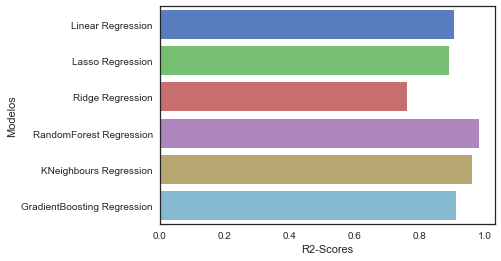

In [70]:
# Diagrama de barras de los distintos modelos en función del R^2
sns.barplot(x='R2-Scores', y='Modelos', data=comparacion, palette='muted')

* De la representación del diagrama de barras de los distintos modelos en función del R^2 observamos que 
el modelo que tiene un R^2 es Random Forest Regressor con un valor de R^2 = 0.98

Reaizamos la representación de la precisión de cada modelo en forma de box-plot:

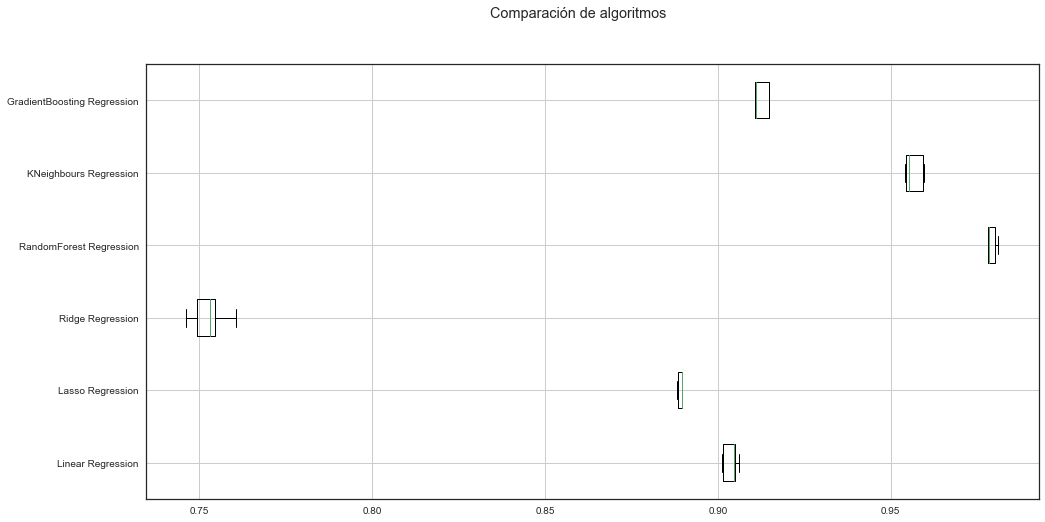

In [71]:
# Comparación de algoritmos en forma de boxplot
fig = plt.figure(figsize=(16, 8))
fig.suptitle('Comparación de algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(resultados, vert=False)
ax.set_yticklabels(modelos)
plt.grid()
plt.show()

* De la representación en forma de boxplot de los distintos modelos en función de la precisión, observamos 
que Random Forest Regressor tiene mejor precisió. También, observamos que rango intercuartílico para dicho 
modelo es estrecho lo que quiere decir que los datos son consistentes.
* El número de predictores relevantes no es elevado. A lo sumo las variables significativas son: 
carat, volumen y clarity; que son las variables que nos sirven para entrenar los modelos.
En mi caso, he usado todas las variables ya que el número de varibles independientes que tiene el problema
no es muy elevado y no queríamos sesgar los resultados por omisión de variables. También, quería evitar el 
riesgo de overfitting en el caso de Random Forest Regressor